In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from cycler import cycler
import datetime
import seaborn as sns
import re
import datetime

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 100

In [120]:
df = pd.read_csv("data/rats_v2.csv", parse_dates=['publish_date'])

In [121]:
df = df[df['author'].str.contains('Community')]

In [146]:
df['obj_id'] = df['obj_id'].apply(lambda x: f"https://blockparty.studio/Archive/?_id={x}")

In [148]:
df_to_send = df[['obj_id', 'video_url', 'author', 'publish_date', 'title','length', 'topic_label',
       'topic_label_count', 'topic_count', 'rats', 'pests', 'rodents', 'mice',
       'vermin', 'rats_total', 'key_sentence']]

In [150]:
df_to_send.rename(columns={'obj_id':'BlockParty_URL', 'video_url':'YouTube_URL'}, inplace=True)

/Users/sarah/opt/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [152]:
df_to_send.to_csv('data/Community Board Transcript - Rats.csv', index=False)

In [177]:
df_to_send[df_to_send.title.str.contains('[Cc]ommittee')].shape

(189, 16)

In [178]:
185/296

0.625

In [147]:
df.head()

obj_id  \
0  https://blockparty.studio/Archive/?_id=5fe7e243539a4d487dc18b69   
1  https://blockparty.studio/Archive/?_id=5fe7e243539a4d487dc18b6b   
2  https://blockparty.studio/Archive/?_id=5fe7e244539a4d487dc18b79   
3  https://blockparty.studio/Archive/?_id=5fe7e244539a4d487dc18b81   
4  https://blockparty.studio/Archive/?_id=5fe7e244539a4d487dc18b88   

                                     video_url                        author  \
0  https://www.youtube.com/watch?v=n96Xzbg7Fls  Manhattan Community Board 12   
1  https://www.youtube.com/watch?v=WYAIXLdB9wI  Manhattan Community Board 12   
2  https://www.youtube.com/watch?v=jvjSVyRCzCE  Manhattan Community Board 12   
3  https://www.youtube.com/watch?v=ZG4Wwc-hDXU   Manhattan Community Board 3   
4  https://www.youtube.com/watch?v=iFmGCX6Sf_0   Manhattan Community Board 8   

  publish_date                                    title  \
0   2020-11-06                     Health & Environment   
1   2020-06-15       Executive Committee Virtualmeeting   
2   2020-09-03                  Aging Committee Meeting   
3   2020-10-23  Manhattan - Executive Committee Meeting   
4   2020-11-20         Environment & Sanitation Meeting   

                                                                                                 topic  \
0  [[0.616631269454956, 'Health'], [0.03978963568806648, 'Equity'], [0.03899894282221794, 'Landmark...   
1  [[0.4039784073829651, 'Parks'], [0.29193249344825745, 'Budget'], [0.05478978529572487, 'Quality ...   
2  [[0.34555184841156006, 'Budget'], [0.3257797956466675, 'Health'], [0.0619976632297039, 'General'...   
3  [[0.7447435259819031, 'Parks'], [0.06402753293514252, 'Budget'], [0.05580954998731613, 'Transpor...   
4  [[0.1319103091955185, 'Quality of Life'], [0.12339847534894943, 'Safety'], [0.0966980829834938, ...   

                                                                                            word_count  \
0  {'services': 15, 'health': 15, 'fireworks': 36, 'space': 7, 'percent': 30, 'data': 6, 'numbers':...   
1  {'report': 4, 'business': 6, 'traffic': 5, 'summer': 3, 'businesses': 14, 'school': 14, 'parks':...   
2  {'seniors': 21, 'centers': 9, 'food': 7, 'health': 5, 'business': 15, 'right': 14, 'day': 13, 'b...   
3  {'parks': 36, 'funding': 28, 'order': 26, 'budget': 21, 'school': 21, 'services': 5, 'staff': 17...   
4  {'rats': 13, 'monitoring': 9, 'rat': 5, 'property': 7, 'air': 7, 'garbage': 6, 'monitors': 23, '...   

    length topic_label  topic_label_count  \
0  3:07:09        rats                  2   
1  2:12:43        rats                  1   
2  1:23:26        rats                  1   
3  2:22:28        rats                  5   
4  2:07:30        rats                 92   

                                                                    topic_count  \
0                                         {'\\brats?\\b': 1, '\\bpests?\\b': 1}   
1                                                         {'\\brodents?\\b': 1}   
2                                                            {'\\brats?\\b': 1}   
3                                       {'\\brats?\\b': 4, '\\brodents?\\b': 1}   
4  {'\\brats?\\b': 84, '\\bmice\\b': 1, '\\bpests?\\b': 3, '\\brodents?\\b': 4}   

   rats  pests  rodents  mice  vermin  rats_total  \
0   1.0    1.0      NaN   NaN     NaN         2.0   
1   NaN    NaN      1.0   NaN     NaN         1.0   
2   1.0    NaN      NaN   NaN     NaN         1.0   
3   4.0    NaN      1.0   NaN     NaN         5.0   
4  84.0    3.0      4.0   1.0     NaN        92.0   

                                                                                          key_sentence  
0  ['number 16 was to provide funding to ensure that all local public schools have multi-service he...  
1  ["So as we might assume that the mess was left there by, let's say somebody who was having a bar...  
2                       ["That garbage is not picked up routinely and I'm seeing more rats than ever"]  
3  ['2 rat mitigatio

In [4]:
#df_sentence = df.explode('key_sentence')

### Concatenate with Map

In [2]:
#geospatial imports
import geopandas as gp
from geopandas import GeoDataFrame
import shapely
from fiona.crs import from_epsg
import pylab as pl
import ast


In [3]:
cb_geo = gp.GeoDataFrame.from_file("../../data/cb_shapefile/Community Districts/" + 
                                     "geo_export_65cbbece-66d9-4f1a-ad7d-be157847c3cb.shp")

cb_info = pd.read_csv("../../data/cb_shapefile/CB-indicators.csv")

cb_info = cb_info[['borocd','cd_full_title']]

cb_info['cd_full_title'] = cb_info['cd_full_title'].apply(lambda x: x.replace('District', 'Board'))

In [4]:
topic_map = cb_info.merge(df, left_on=['cd_full_title'], right_on=['author'])

NameError: name 'df' is not defined

In [170]:
df['author'].value_counts()

Manhattan Community Board 7        41
Manhattan Community Board 8        32
Manhattan Community Board 3        31
Manhattan Community Board 12       22
Manhattan Community Board 4        21
Brooklyn Community Board 2         17
Manhattan Community Board 11       14
Manhattan Community Board 5        13
Manhattan Community Board 1        13
Manhattan Community Board 6        12
Bronx Community Board 12           10
Bronx Community Board 2             9
Brooklyn Community Board 8          8
Bronx Community Board 11            7
Brooklyn Community Board 14         6
Manhattan Community Board 2         6
Brooklyn Community Board 1          6
Manhattan Community Board 10        5
Brooklyn Community Board 4          3
Brooklyn Community Board 6          3
Brooklyn Community Board 7          3
Queens Community Board 5            3
Brooklyn Community Board 10         3
Brooklyn Community Board 11         2
Bronx Community Board 3             1
Queens Community Board 4            1
Queens Commu

In [20]:
df[df['author'] =='NYC Department of City Planning']['key_sentence'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      3
["So if you've joined us via zoom, you can just move your mouse around over your screen and a toolbar will appear at the bottom, where you'll see a little yellow raised hand if you click on that, you'll be added to the speaker here."]                                                                                                                                                                                                                                                    

Any kind of quantification of mentions?  X community boards spoke about rats, or "X # of mentions by Com. boards across the city?

30 Community boards spoke about rats, between 2016-10-05 & 2021-07-23, out of 32 Community Boards with a meeting recording on YouTube.

Manhattan Community Board 7        41
Manhattan Community Board 8        32
Manhattan Community Board 3        31
Manhattan Community Board 12       22
Manhattan Community Board 4        21
Brooklyn Community Board 2         17
Manhattan Community Board 11       14
Manhattan Community Board 5        13
Manhattan Community Board 1        13
Manhattan Community Board 6        12
Bronx Community Board 12           10
Bronx Community Board 2             9
Brooklyn Community Board 8          8
Bronx Community Board 11            7
Brooklyn Community Board 14         6
Manhattan Community Board 2         6
Brooklyn Community Board 1          6
Manhattan Community Board 10        5
Brooklyn Community Board 4          3
Brooklyn Community Board 6          3
Brooklyn Community Board 7          3
Queens Community Board 5            3
Brooklyn Community Board 10         3
Brooklyn Community Board 11         2
Bronx Community Board 3             1
Queens Community Board 4            1
Queens Community Board 1            1
Queens Community Board 3            1
Queens Community Board 2            1
Staten Island Community Board 2     1

In [142]:
df.author.value_counts().sum()

296

In [37]:
df[df['publish_date']>'2020-01-01 00:00:00'].publish_date.min()

Timestamp('2020-02-04 00:00:00')

In [36]:
len(df[df['publish_date']>'2020-01-01 00:00:00']['author'].unique())

30

In [27]:
df[df.topic_label_count == df.topic_label_count.max()]

obj_id                                    video_url  \
4  5fe7e244539a4d487dc18b88  https://www.youtube.com/watch?v=iFmGCX6Sf_0   

                        author publish_date                             title  \
4  Manhattan Community Board 8   2020-11-20  Environment & Sanitation Meeting   

                                                                                                 topic  \
4  [[0.1319103091955185, 'Quality of Life'], [0.12339847534894943, 'Safety'], [0.0966980829834938, ...   

                                                                                            word_count  \
4  {'rats': 13, 'monitoring': 9, 'rat': 5, 'property': 7, 'air': 7, 'garbage': 6, 'monitors': 23, '...   

    length topic_label  topic_label_count  \
4  2:07:30        rats                 92   

                                                                    topic_count  \
4  {'\\brats?\\b': 84, '\\bmice\\b': 1, '\\bpests?\\b': 3, '\\brodents?\\b': 4}   

   rats  pests  rodents  mice  vermin  rats_total  
4  84.0    3.0      4.0   1.0     NaN        92.0

In [187]:
df[df.topic_label_count == df.topic_label_count.max()]

obj_id                                    video_url  \
70  60aeec2262c08b4eeaa01bd6  https://www.youtube.com/watch?v=Zy8-22i1aMo   

                         author publish_date                        title  \
70  Brooklyn Community Board 14   2021-05-26  Executive Committee Meeting   

                                                                                                  topic  \
70  [[0.27124786376953125, 'Elections'], [0.12112481147050858, 'Transportation'], [0.102815836668014...   

                                                                                             word_count  \
70  {'choice': 14, 'voting': 10, 'votes': 4, 'rank': 3, 'election': 4, 'strawberry': 4, 'voters': 17...   

     length           topic_label  topic_label_count  \
70  0:59:18  Ranked Choice Voting                 30   

                                    topic_count  ranked.choice  RCV  \
70  {'\\bRCV\\b': 1, '\\branked.choice\\b': 29}             29  1.0   

    Ranked Choice Voting  \
70                  30.0   

                                                                                           key_sentence  
70  ["\nWe'll be hearing from district manager, sean Campbell and then we'll be hearing a presentati...

In [11]:
df.head(1)

obj_id                                    video_url  \
0  5fe7e244539a4d487dc18b90  https://www.youtube.com/watch?v=YNrivXMtc54   

                        author publish_date                        title  \
0  Manhattan Community Board 5   2020-11-11  Executive Committee Meeting   

                                                                                                 topic  \
0  [[0.5213412046432495, 'Health'], [0.09882984310388565, 'Safety'], [0.09632548689842224, 'Employm...   

                                                                                            word_count  \
0  {'position': 5, 'building': 2, 'sign': 2, 'notes': 12, 'applicant': 11, 'master': 11, 'plan': 11...   

    length           topic_label  topic_label_count  \
0  1:01:35  Ranked Choice Voting                  1   

                  topic_count  ranked.choice  RCV  Ranked Choice Voting_total  \
0  {'\\branked.choice\\b': 1}              1  NaN                         1.0   

                                                                                          key_sentence  
0  ["and then we're gonna obviously see how ranked choice voting goes when that happens, which woul...

In [ ]:
# Fun Fact about CB 12

In [ ]:

ax.set_prop_cycle(cycler('color', [ "#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) +
                   cycler('lw', [1, 2, 3, 4, 5, 6]))
other_topics.plot(ax=ax, linewidth=4)
ax.set_title('Street Topics (by Week)', size=23)
ax.set_ylabel('Count of Mentions', size=18)
ax.set_xlabel('Date', size=14)
ax.legend(loc='upper left', prop={'size': 14})    
plt.savefig(f'Viz/Transportation/StreetTypeWeekly_{datetime.date.today()}.png')

In [12]:
def visualize_avg(cb,topic_list):

    d = {}
    for i in topxlist:
        d[i] = round(df[df['author']==cb][i].mean())
    
    fig, ax = plt.subplots(figsize=(8,8))
    #Plot the data:
    my_colors_short = ["#FFC847", "#00E09D", "#00BBEA" ]
    plt.bar(d.keys(), d.values(),width=.75, color= my_colors_short[::-1])
    
    
    ax.set_title(f"Average Term Count For {df[df['author']==cb].shape[0]} Total Meetings\n\
    {cb}", size=19, weight='bold', c='grey',pad=20)
    
    ax.set_ylabel('Term Count (Per Meeting)', size=14, weight='bold', c='grey')
    ax.set_xlabel('Term', size=14, weight='bold', c='grey')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False,labelleft=False)
    ax.spines['bottom'].set_color('grey')
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left')
    ax.xaxis.label.set_color('grey')
    #ax.tick_params(axis='x', colors='grey',size=15)
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', colors='grey',size=15)
    #ax.xaxis.label.set_size(20)
    #ax.yaxis.label.set_size(20)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    n = list(d.keys()) 
    s = list(d.values())            
    for i in range(len(s)):
        plt.annotate(str(n[i]), xy=(n[i],s[i]), ha='center', va='bottom', c='grey',size=18)
    #plt.savefig(f'Viz/Transportation/avg_{cb}_{datetime.date.today()}.png')

In [13]:
topxlist = ['Ranked Choice Voting_total']

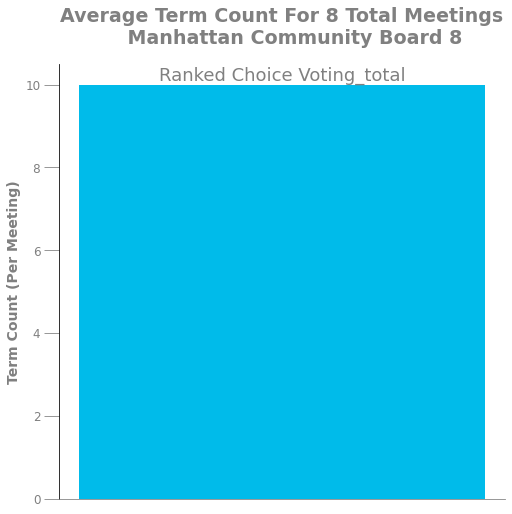

In [14]:
visualize_avg('Manhattan Community Board 8', topxlist)

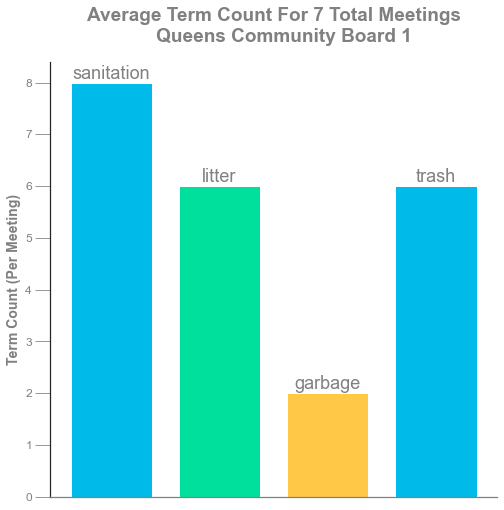

In [529]:
visualize_avg('Queens Community Board 1', topxlist)

In [729]:
#Plot the data:
my_colors_short = ["#FFC847", "#00E09D", "#00BBEA" ]

In [714]:
topxlist = ['Car','Bike','Parking']
d = {}

In [719]:
for i in topxlist:
    d[i] = round(df[df['author']=='Manhattan Community Board 8'][i].mean())

# Time Series

In [17]:
#df.set_index('publish_date', inplace=True)

In [40]:
df.head(1)

obj_id                                    video_url  \
0  5fe7e243539a4d487dc18b69  https://www.youtube.com/watch?v=n96Xzbg7Fls   

                         author publish_date                 title  \
0  Manhattan Community Board 12   2020-11-06  Health & Environment   

                                                                                                 topic  \
0  [[0.616631269454956, 'Health'], [0.03978963568806648, 'Equity'], [0.03899894282221794, 'Landmark...   

                                                                                            word_count  \
0  {'services': 15, 'health': 15, 'fireworks': 36, 'space': 7, 'percent': 30, 'data': 6, 'numbers':...   

    length topic_label  topic_label_count  \
0  3:07:09        rats                  2   

                             topic_count  rats  pests  rodents  mice  vermin  \
0  {'\\brats?\\b': 1, '\\bpests?\\b': 1}   1.0    1.0      NaN   NaN     NaN   

   rats_total  
0         2.0

In [41]:
df.rename(columns={'rats_total':"Rats"},inplace=True)

In [31]:
type(df['publish_date'])

pandas.core.series.Series

In [44]:
weekly = df.groupby([pd.Grouper(key='publish_date', freq='W')
               ]).sum()

In [45]:
monthly = df.groupby([pd.Grouper(key='publish_date', freq='MS')
               ]).sum()

In [12]:
monthly.head(1)

topic_label_count  ranked.choice  rank.choice  RCV  \
publish_date                                                       
2019-09-01                    5            3.0          2.0  0.0   

              Ranked Choice Voting  
publish_date                        
2019-09-01                     5.0

In [36]:
#weekly = weekly.iloc[:,:-1]
#monthly = monthly.iloc[:,:-1]

In [63]:
df[(df.RCV > 0)]['key_sentence'].value_counts()

["\nI'll send I'll, put the link in the description where you can register we're, having a ranked choice, voting empowerment, training on saturday at 1 pm.", 'So if you know anybody that wants to learn about ranked choice voting, you guys can register to do that on saturday at 1 pm.', "We need to make it simple, easier, more direct for people to get to the polls when they know who they want to vote for, but that's another thing to know that this year ranked choice voting is in play.", "It wasn't in effect when councilman riley first ran in December, but now it's in effect for all city elections, so for the specials coming up for the 11th for the primary June 22nd understand that it is ranked choice voting", '\nPlease share the information, because still not enough people know that ranked choice.', "So that's probably part of the problem, so Matthew Kitt is the representing the New York City campaign finance board, and so what I'm going to ask him to do is come in and give us a presenta

In [42]:
df[(df.publish_date < '2020-04-01')]['key_sentence'].value_counts()

['So if you are for ranked choice voting, you can vote YES on number 1 and November 5th.', "If you're not familiar with that, please see me or the staff after the meeting was already mentioned about Senator Biaggi, coming to our October meeting the borough board in Breaux cabin Mina attended this morning down at Borough Hall, in addition to ranked choice, voting, which was already spoken by one of our gallery-stress intercession speakers."]    1
['Is the Charter 2019 ballot, five questions, and one of them is about voting, how you can vote in a way that where we would be able to do it in a way that it means you can list people that dissimilar from what you just heard in terms of how you list your chairs, when you are voting tonight, that is a number one ranked choice voting.']                                                                                                               1
["So how many people know what ranked choice voting is all right most, but not all it's pretty simpl

In [232]:
#data = data[data.index > '2020-03-01']#.shape

In [313]:
#weekly = weekly[(weekly.index >= '2020-04-01') & (weekly.index <= monthly.index.max())]

In [46]:
weekly = weekly[(weekly.index >= '2020-06-01')]

In [47]:
monthly = monthly[(monthly.index > '2020-05-01')]

In [65]:
#monthly = monthly[(monthly.index > '2020-03-01') & (monthly.index < '2021-03-01')]#.shape

#weekly = weekly[(weekly.index >= '2020-04-01') & (weekly.index <= data.index.max())]#.shape

In [48]:
weekly.head()

topic_label_count  rats  pests  rodents  mice  vermin  Rats
publish_date                                                             
2020-06-07                    0   0.0    0.0      0.0   0.0     0.0   0.0
2020-06-14                   17   7.0    0.0     10.0   0.0     0.0  17.0
2020-06-21                    4   1.0    0.0      1.0   2.0     0.0   4.0
2020-06-28                    0   0.0    0.0      0.0   0.0     0.0   0.0
2020-07-05                    1   0.0    0.0      0.0   1.0     0.0   1.0

In [82]:
weekly.head()

topic_label_count  ranked.choice  RCV  Ranked Choice Voting
publish_date                                                             
2020-06-07                    0              0  0.0                   0.0
2020-06-14                    0              0  0.0                   0.0
2020-06-21                    0              0  0.0                   0.0
2020-06-28                    0              0  0.0                   0.0
2020-07-05                    0              0  0.0                   0.0

In [16]:
monthly.head()

topic_label_count  ranked.choice  rank.choice  RCV  \
publish_date                                                       
2020-06-01                    0            0.0          0.0  0.0   
2020-07-01                    0            0.0          0.0  0.0   
2020-08-01                    0            0.0          0.0  0.0   
2020-09-01                    2            2.0          0.0  0.0   
2020-10-01                    5            5.0          0.0  0.0   

              Ranked Choice Voting  
publish_date                        
2020-06-01                     0.0  
2020-07-01                     0.0  
2020-08-01                     0.0  
2020-09-01                     2.0  
2020-10-01                     5.0

In [83]:
monthly.head()

topic_label_count  ranked.choice  RCV  Ranked Choice Voting
publish_date                                                             
2020-06-01                    0              0  0.0                   0.0
2020-07-01                    0              0  0.0                   0.0
2020-08-01                    0              0  0.0                   0.0
2020-09-01                    2              2  0.0                   2.0
2020-10-01                    5              5  0.0                   5.0

In [66]:
monthly.columns

Index(['topic_label_count', 'virtual', 'Open Meetings Law',
       'public participation', 'Public Officers Law', 'in.person access',
       'Open Meetings Law'],
      dtype='object')

In [97]:
df[(df['publish_date']>'2021-03-01') & (df['publish_date']<'2021-04-01') & (df.topic_label_count==43)]#.key_sentence.value_counts()

obj_id    video_url                    author  \
561  604e823f7b9dcf683dbac452  IzeM6_KL2hw  Bronx Community Board 12   

    publish_date                             title  \
561   2021-03-02  Bx CBExecutive Committee Meeting   

                                                 topic  \
561  [[0.8889419436454773, 'Housing'], [0.012272585...   

                                        fullTranscript  \
561  Or so Kristen I missed your presentation back ...   

                                            word_count   length  \
561  {'law': 11, 'body': 10, 'public': 10, 'website...  1:44:37   

           topic_label  topic_label_count  \
561  Open Meetings Law                 43   

                                           topic_count  virtual  \
561  {'\bOpen Meetings? Law\b': 39, '\bpublic parti...      1.0   

     Open Meetings Law  public participation  Public Officers Law  \
561               39.0                   3.0                  NaN   

     in.person access  Open Meetings Law  \
561               NaN               43.0   

                                          key_sentence  
561  [\nI did the open meetings law and then that's...

In [17]:
monthly

topic_label_count  ranked.choice  rank.choice  RCV  \
publish_date                                                       
2020-06-01                    0            0.0          0.0  0.0   
2020-07-01                    0            0.0          0.0  0.0   
2020-08-01                    0            0.0          0.0  0.0   
2020-09-01                    2            2.0          0.0  0.0   
2020-10-01                    5            5.0          0.0  0.0   
2020-11-01                    3            3.0          0.0  0.0   
2020-12-01                    9            9.0          0.0  0.0   
2021-01-01                   30           23.0          7.0  0.0   
2021-02-01                   48           39.0          8.0  1.0   
2021-03-01                  106           79.0         22.0  5.0   
2021-04-01                   40           37.0          3.0  0.0   
2021-05-01                  237          169.0         66.0  2.0   
2021-06-01                   50           34.0         14.0  2.0   

              Ranked Choice Voting  
publish_date                        
2020-06-01                     0.0  
2020-07-01                     0.0  
2020-08-01                     0.0  
2020-09-01                     2.0  
2020-10-01                     5.0  
2020-11-01                     3.0  
2020-12-01                     9.0  
2021-01-01                    30.0  
2021-02-01                    48.0  
2021-03-01                   106.0  
2021-04-01                    40.0  
2021-05-01                   237.0  
2021-06-01                    50.0

In [84]:
monthly

topic_label_count  ranked.choice  RCV  Ranked Choice Voting
publish_date                                                             
2020-06-01                    0              0  0.0                   0.0
2020-07-01                    0              0  0.0                   0.0
2020-08-01                    0              0  0.0                   0.0
2020-09-01                    2              2  0.0                   2.0
2020-10-01                    5              5  0.0                   5.0
2020-11-01                    3              3  0.0                   3.0
2020-12-01                    9              9  0.0                   9.0
2021-01-01                   23             23  0.0                  23.0
2021-02-01                   40             39  1.0                  40.0
2021-03-01                   84             79  5.0                  84.0
2021-04-01                   37             37  0.0                  37.0
2021-05-01                  171            169  2.0                 171.0
2021-06-01                   36             34  2.0                  36.0

In [49]:
topic_analyze = ['Rats']

In [50]:
topic_dir = f"Viz/Topics/{topic_analyze[0]}"

In [51]:
import os
os.makedirs(topic_dir, exist_ok=True) 

In [56]:
test = weekly[['Rats']]

In [57]:
my_colors = ["#00E09D"]

In [54]:
test.columns[0]

'Rats'

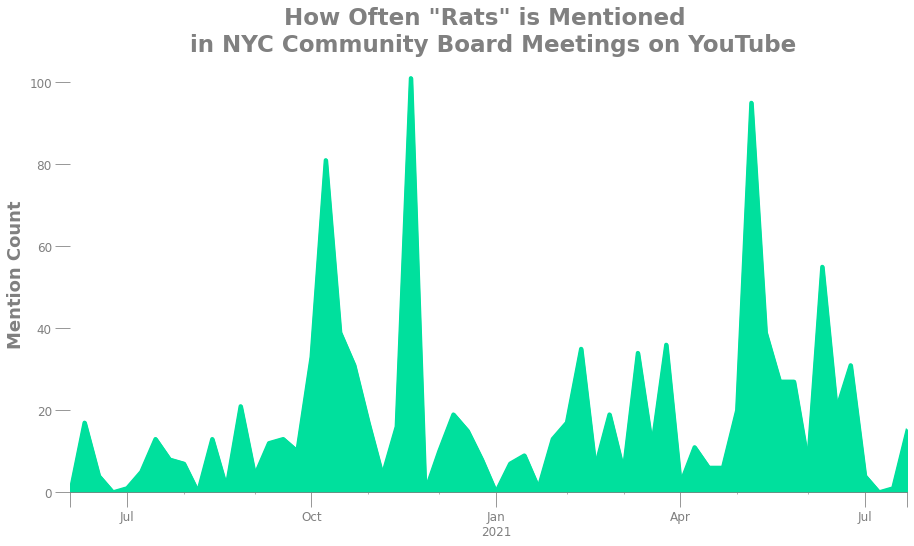

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.set_prop_cycle(cycler('color', [ "#00E09D",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) + cycler('lw', [1, 2, 3, 4, 5]))
test.plot.area(ax=ax, linewidth=4, color="#00E09D", legend = False)
ax.set_title(f'How Often "{topic_analyze[0]}" is Mentioned \n in NYC Community Board Meetings on YouTube', size=23, 
             weight='bold', c='grey')
ax.set_ylabel('Mention Count', size=18, weight='bold', c='grey')
ax.set_xlabel('', size=14, weight='bold', c='grey')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')
#handles, labels = ax.get_legend_handles_labels()
ax.xaxis.label.set_color('grey')
ax.tick_params(colors='grey', which='both') 
ax.tick_params(axis='x', colors='grey',size=15)
ax.get_xaxis().set_visible(True)
ax.tick_params(axis='y', colors='grey',size=15)
ax.tick_params(axis='x', colors='grey',size=15)
#ax.xaxis.label.set_size(20)
#ax.yaxis.label.set_size(20)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.legend(loc='upper left', prop={'size': 14})    
plt.savefig(f'{topic_dir}/area_plot_weekly_{datetime.date.today()}.jpg')
plt.show()

In [61]:
b_group = topic_map.groupby([pd.Grouper(key='publish_date', freq='W'),
                 pd.Grouper('borocd')
               ]).sum()

In [62]:
b_group.tail()

topic_label_count  rats  pests  rodents  mice  vermin  \
publish_date borocd                                                          
2021-07-04   108                     1   1.0    0.0      0.0   0.0     0.0   
             302                     2   0.0    0.0      2.0   0.0     0.0   
2021-07-18   101                     1   1.0    0.0      0.0   0.0     0.0   
2021-07-25   102                    13  11.0    0.0      0.0   0.0     2.0   
             307                     2   2.0    0.0      0.0   0.0     0.0   

                     rats_total  
publish_date borocd              
2021-07-04   108            1.0  
             302            2.0  
2021-07-18   101            1.0  
2021-07-25   102           13.0  
             307            2.0

In [63]:
b_group.reset_index(inplace=True)

#b_group['Bike_CitiBike'] = b_group['Bike']+b_group['CitiBike']

b_group.set_index('publish_date',inplace=True)

In [64]:
topic_analyze = 'rats_total'

In [106]:
b_group_weekly = b_group[(b_group.index >= '2020-06-01')]

In [114]:
cm = plt.get_cmap('gist_rainbow')

In [128]:
clrs

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9694979754285514, 0.4537284387051496, 0.40783466214891867),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.6234809659087222, 0.6330654918766613, 0.19369052933737949),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.46810256823426116, 0.6699492535792404, 0.19289587399044988),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.19645998900718342, 0.6974309119838096, 0.3614680088321782),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2047934223695329, 0.6857201900461317, 0.5491539606228022),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.2161609050020783, 0.6684079809438751, 0.7255515774097884),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.22480301438618688, 0.6541170341314059, 0.8343335482693295),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.43328034117642245, 0.6065273407962816, 0.9585467098271748),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.6968456641452155, 0.5283777451706791, 0.9581680759272918),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9596479078308885, 0.3748291312853888, 0.8930044537663009),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104),
 (0.9660237860697111, 0.42783187979900156, 0.636998264206457)]

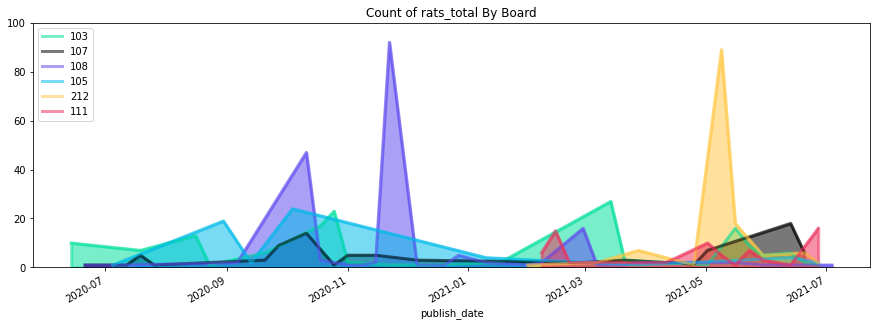

In [169]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(15, 5))
thres = 49
top_cb = []

NUM_COLORS = len(b_group_weekly['borocd'].unique())
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)

"""sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS) 
axes.set_prop_cycle(color=clrs)"""

axes.set_prop_cycle(cycler('color', [ "#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) +
                   cycler('lw', [1, 2, 3, 4, 5, 6]))

for cb in b_group_weekly['borocd'].unique():
    if b_group_weekly[b_group_weekly['borocd']==cb][[topic_analyze]].sum().values[0] > thres:
        top_cb.append(cb)


for i in top_cb:
    b_group_weekly[b_group_weekly['borocd']==i][[topic_analyze]].plot.area(label=i,lw=3, ax = axes,  alpha=0.53, )

    axes.legend(labels=top_cb, loc='upper left')


plt.title(f'Count of {topic_analyze} By Board')
plt.ylim([0, 100])
plt.show()   


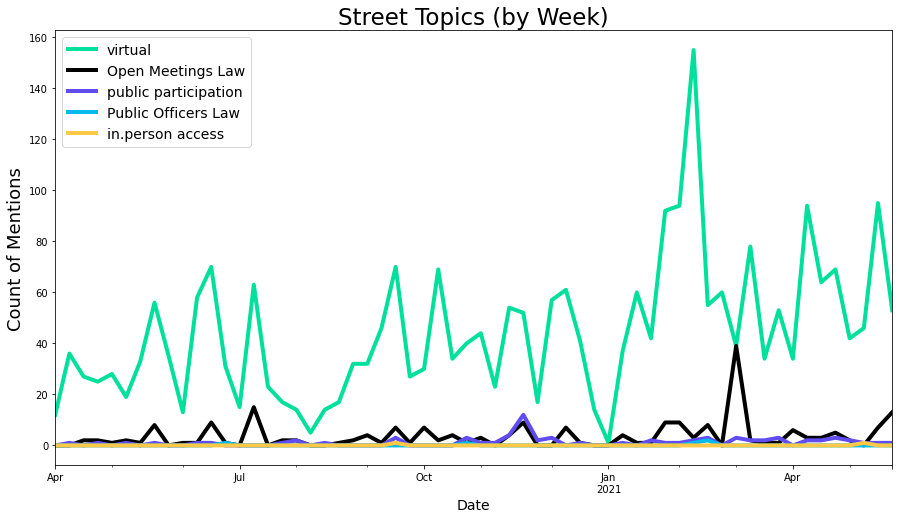

In [100]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_prop_cycle(cycler('color', [ "#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) +
                   cycler('lw', [1, 2, 3, 4, 5, 6]))
other_topics.plot(ax=ax, linewidth=4)
ax.set_title('Street Topics (by Week)', size=23)
ax.set_ylabel('Count of Mentions', size=18)
ax.set_xlabel('Date', size=14)
ax.legend(loc='upper left', prop={'size': 14})    
#plt.savefig(f'Viz/Transportation/StreetTypeWeekly_{datetime.date.today()}.png')
plt.show()

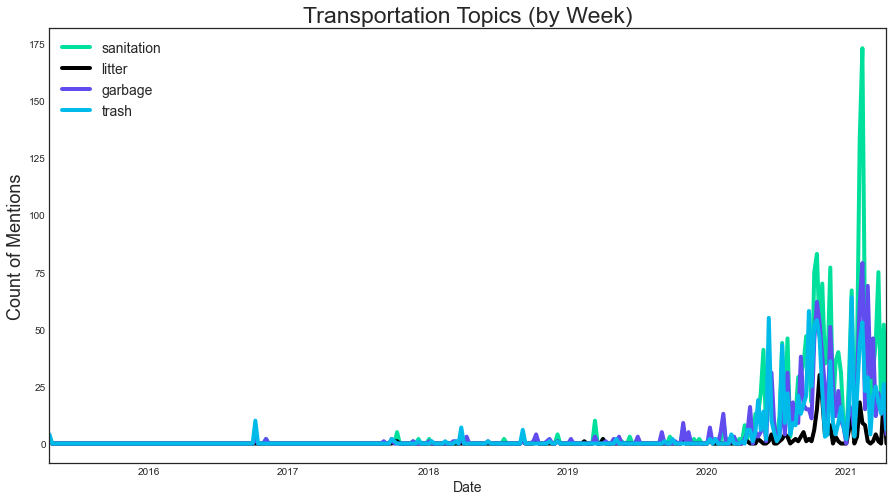

In [531]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_prop_cycle(cycler('color', [ "#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) +
                   cycler('lw', [1, 2, 3, 4, 5, 6]))
small_subset.plot(ax=ax, linewidth=4)
ax.set_title('Transportation Topics (by Week)', size=23)
ax.set_ylabel('Count of Mentions', size=18)
ax.set_xlabel('Date', size=14)
ax.legend(loc='upper left', prop={'size': 14})    
#plt.savefig(f'Viz/Transportation/transitTypeWeekly_{datetime.date.today()}.png')
plt.show()

In [56]:
other_topics = monthly[[ 'Parking','Traffic','Transportation', 'DoT', 'Greenway', 'Street Safety']]

In [57]:
small_subset = monthly[['Bus', 'Pedestrian','Traffic','Parking', 'Car', 'Bike']]

In [58]:
high_topics = monthly[['Traffic','Car','Parking', "Bike"]]

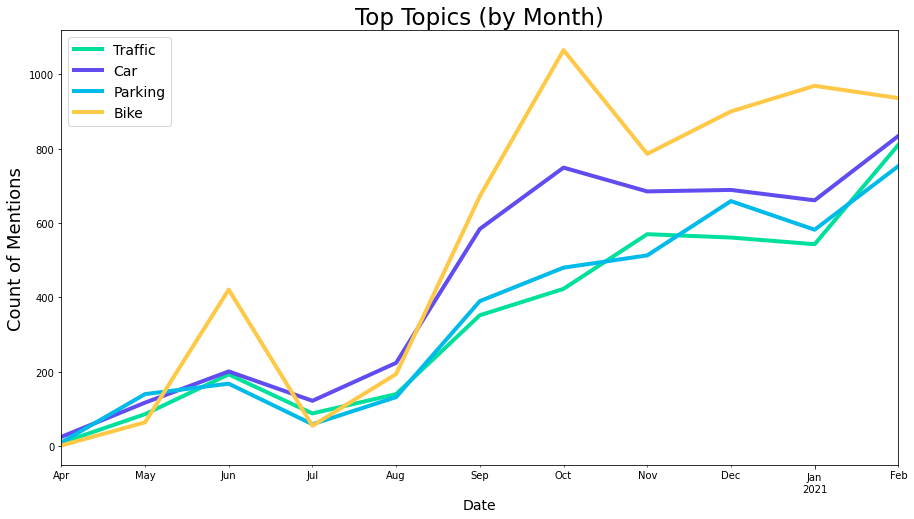

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_prop_cycle(cycler('color', [ "#00E09D",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) +
                   cycler('lw', [1, 2, 3, 4, 5]))
high_topics.plot(ax=ax, linewidth=4)
ax.set_title('Top Topics (by Month)', size=23)
ax.set_ylabel('Count of Mentions', size=18)
ax.set_xlabel('Date', size=14)
ax.legend(loc='upper left', prop={'size': 14})    
plt.savefig(f'Viz/Transportation/Top_topicsMonthly_{datetime.date.today()}.png')
plt.show()

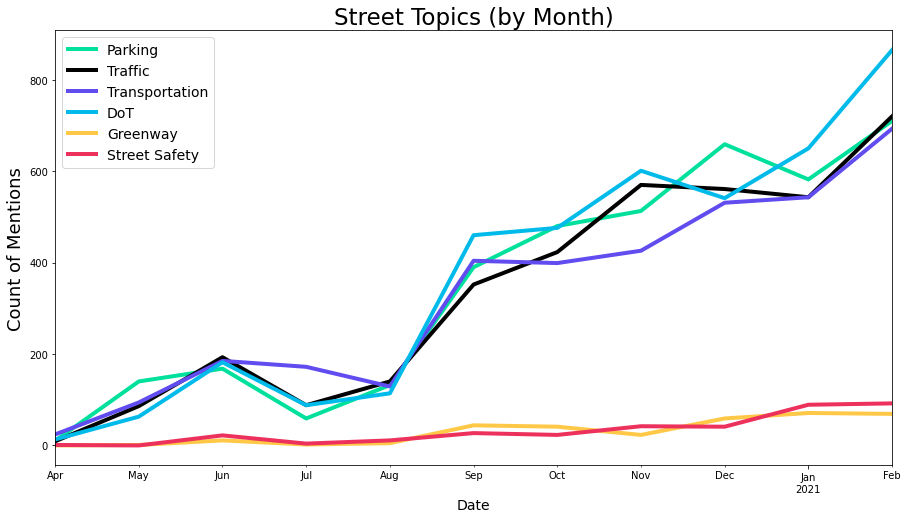

In [132]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_prop_cycle(cycler('color', [ "#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]) +
                   cycler('lw', [1, 2, 3, 4, 5, 6]))
other_topics.plot(ax=ax, linewidth=4)
ax.set_title('Street Topics (by Month)', size=23)
ax.set_ylabel('Count of Mentions', size=18)
ax.set_xlabel('Date', size=14)
ax.legend(loc='upper left', prop={'size': 14})    
plt.savefig(f'Viz/Transportation/StreetTypeMontly_{datetime.date.today()}.png')
plt.show()

In [ ]:
[ "#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D" ]

In [ ]:
# if only 4 - "#FFC847", "#00E09D", "#00BBEA","#604CEF" 

In [ ]:
"#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D"

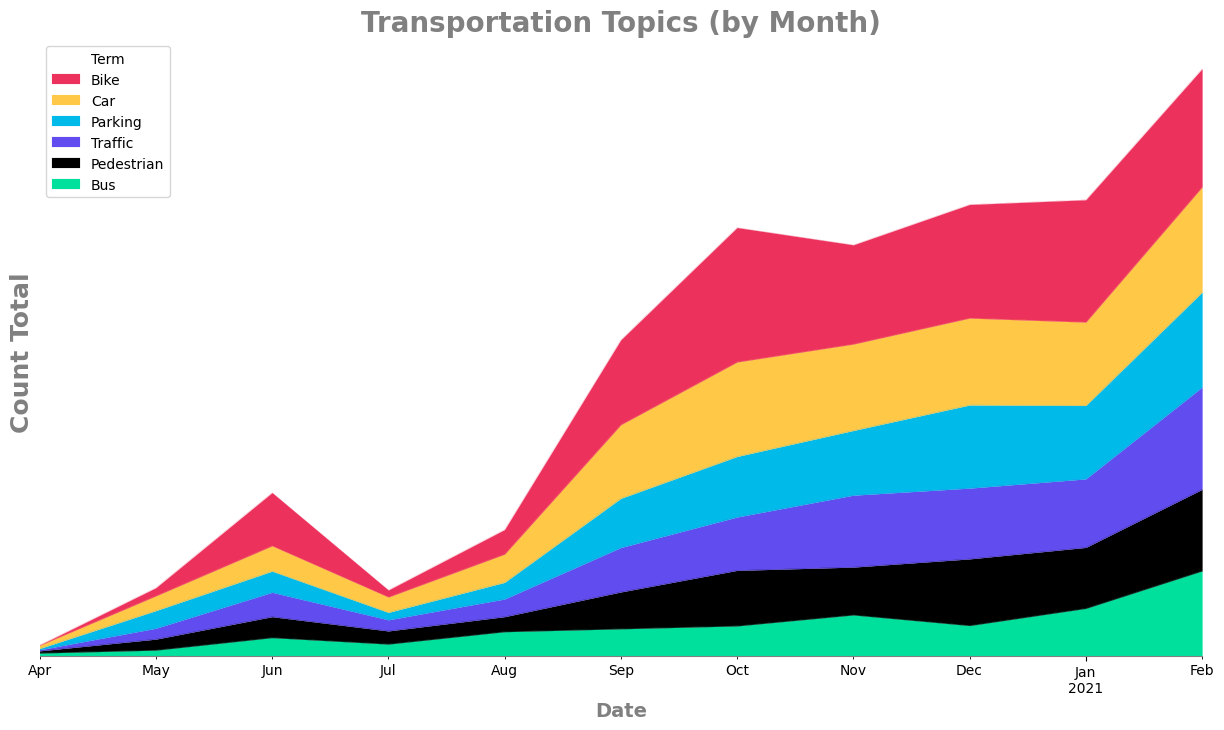

In [167]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_prop_cycle(cycler('color', ["#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D"]) +
                   cycler('lw', [1, 2, 3, 4,5,6]))
small_subset.plot.area(ax=ax, linewidth=.1, stacked=True)
ax.set_title('Transportation Topics (by Month)', size=20, weight='bold', c='grey')
ax.set_ylabel('Count Total ', size=18, weight='bold', c='grey')
ax.set_xlabel('Date', size=14, weight='bold', c='grey')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False,labelleft=False)
ax.spines['bottom'].set_color('grey')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left')
ax.xaxis.label.set_color('grey')
#ax.tick_params(axis='x', colors='grey')

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.legend(loc='upper left', prop={'size': 14})    
#plt.savefig(f'Viz/Transportation/transitTypeMontly_{datetime.date.today()}.png')
plt.show()

In [61]:
#Plot the data:
my_colors = ["#FFC847", "#00E09D", "#00BBEA","#604CEF" ]

In [851]:
small_subset.columns

Index(['Bus', 'Pedestrian', 'Traffic', 'Parking', 'Car', 'Bike'], dtype='object')

In [532]:
man_cb = topic_map[topic_map['cd_full_title'].str.contains('Manhattan')]#['borocd'].unique()

In [879]:
man_cb['cd_full_title'].unique()

array(['Manhattan Community Board 1', 'Manhattan Community Board 2',
       'Manhattan Community Board 3', 'Manhattan Community Board 4',
       'Manhattan Community Board 5', 'Manhattan Community Board 6',
       'Manhattan Community Board 7', 'Manhattan Community Board 8',
       'Manhattan Community Board 10', 'Manhattan Community Board 12'],
      dtype=object)

In [131]:
my_colors = ["#00E09D","#000000",  "#604CEF",  "#00BBEA","#FFC847","#ED315D"]
topic_focus = ['Bus','Pedestrian','Traffic', 'Parking', 'Car', 'Bike']
col_pal = dict(zip(topic_focus, my_colors))

In [132]:
col_pal

{'Bus': '#00E09D',
 'Pedestrian': '#000000',
 'Traffic': '#604CEF',
 'Parking': '#00BBEA',
 'Car': '#FFC847',
 'Bike': '#ED315D'}

In [537]:
df.columns

Index(['obj_id', 'video_url', 'author', 'publish_date', 'title', 'topic',
       'fullTranscript', 'word_count', 'length', 'topic_label',
       'topic_label_count', 'topic_count', 'sanitation', 'solid.waste',
       'trash', 'litter', 'garbage', 'hauler', 'Sanitation', 'key_sentence'],
      dtype='object')

In [104]:
case_study = ['virtual']

In [106]:
topic_map.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            879, 880, 881, 882, 883, 884, 885, 886, 887, 888],
           dtype='int64', length=889)

In [108]:
topic_map.rename(columns={'Open Meetings Law':'oml'},inplace=True)

In [171]:
topic_map[topic_map['cd_full_title']=='Bronx Community Board 12']

borocd             cd_full_title                    obj_id  \
227     212  Bronx Community Board 12  604e7a1d7b9dcf683dbac442   
228     212  Bronx Community Board 12  6050ae25eb5c881d67fcfa47   
229     212  Bronx Community Board 12  605f4e2826657a624b3e1845   
230     212  Bronx Community Board 12  60856b4f9e76bfb1446c46eb   
231     212  Bronx Community Board 12  60945dc4008060fdef9dfa63   
232     212  Bronx Community Board 12  609f0944bec6bdbccd2eda48   
233     212  Bronx Community Board 12  60b21d19418cb7d62b11baf8   
234     212  Bronx Community Board 12  60cb47aca8db7528fbb4748d   
235     212  Bronx Community Board 12  60cb495aa8db7528fbb47493   
236     212  Bronx Community Board 12  60d4862fe2e8c872ba44f4aa   

                                       video_url                    author  \
227  https://www.youtube.com/watch?v=GyVYEhpX9dk  Bronx Community Board 12   
228  https://www.youtube.com/watch?v=o0Vyi4XWUzY  Bronx Community Board 12   
229  https://www.youtube.com/watch?v=4YOr6VwTf6Q  Bronx Community Board 12   
230  https://www.youtube.com/watch?v=ogN53wGXLA0  Bronx Community Board 12   
231  https://www.youtube.com/watch?v=IFgWGalMTGU  Bronx Community Board 12   
232  https://www.youtube.com/watch?v=hmaGPxTh19U  Bronx Community Board 12   
233  https://www.youtube.com/watch?v=87QfAbNuU5s  Bronx Community Board 12   
234  https://www.youtube.com/watch?v=YC6UutyMEfg  Bronx Community Board 12   
235  https://www.youtube.com/watch?v=Fev4TXYvv4g  Bronx Community Board 12   
236  https://www.youtube.com/watch?v=tELFFbVmXs8  Bronx Community Board 12   

    publish_date                                      title  \
227   2021-03-02             Bx CBHousing Committee Meeting   
228   2021-01-26   BxCB12 Executive Committee Meeting 921 1   
229   2021-03-26                    Bx CBFull Board Meeting   
230   2021-04-23                         Full Board Meeting   
231   2021-05-06  Health & Human Services Committee Meeting   
232   2021-05-13                    Parks Committee Meeting   
233   2021-05-28                            Community Board   
234   2021-06-16                         Full Board Meeting   
235   2021-06-16                 Land Use Committee Meeting   
236   2021-06-22    Ad Hoc Not for Profit Committee Meeting   

                                                                                                   topic  \
227  [[0.4520193338394165, 'Housing'], [0.1317269653081894, 'Employment'], [0.05739728733897209, 'Saf...   
228  [[0.3368063271045685, 'Housing'], [0.3309236168861389, 'Budget'], [0.1110716313123703, 'Employme...   
229  [[0.4504573941230774, 'Health'], [0.31310632824897766, 'Housing'], [0.022030377760529518, 'Safet...   
230  [[0.6888952255249023, 'Housing'], [0.1672610640525818, 'Transportation'], [0.040771275758743286,...   
231  [[0.462222158908844, 'Health'], [0.05243173614144325, 'Census'], [0.0523967519402504, 'Sanitatio...   
232  [[0.5297484993934631, 'Parks'], [0.3627389073371887, 'Sanitation'], [0.017193136736750603, 'Safe...   
233  [[0.32280105352401733, 'Police'], [0.27400416135787964, 'Elections'], [0.06489431113004684, 'Inf...   
234  [[0.3539677560329437, 'Police'], [0.3162250220775604, 'Elections'], [0.03179159760475159, 'Safet...   
235  [[0.43293213844299316, 'Zoning'], [0.12979574501514435, 'Land Use'], [0.07127346843481064, 'Heal...   
236  [[0.5082847476005554, 'Health'], [0.04695907607674599, 'Human Services'], [0.045932818204164505,...   

                                                                                              word_count  \
227  {'residents': 23, 'program': 16, 'development': 10, 'property': 7, 'funding': 26, 'unit': 24, 'h...   
228  {'bylaws': 5, 'budget': 4, 'housing': 4, 'hall': 3, 'thursday': 14, 'boards': 12, 'space': 11, '...   
229  {'course': 7, 'report': 4, 'manager': 7, 'health': 9, 'building': 16, 'bylaws': 16, 'commission'...   
230  {'housing': 6, 'building': 5, 'secretary': 26, 'street': 25, 'problem': 23, 'congressman

In [67]:
test.columns[0]

'Rats'

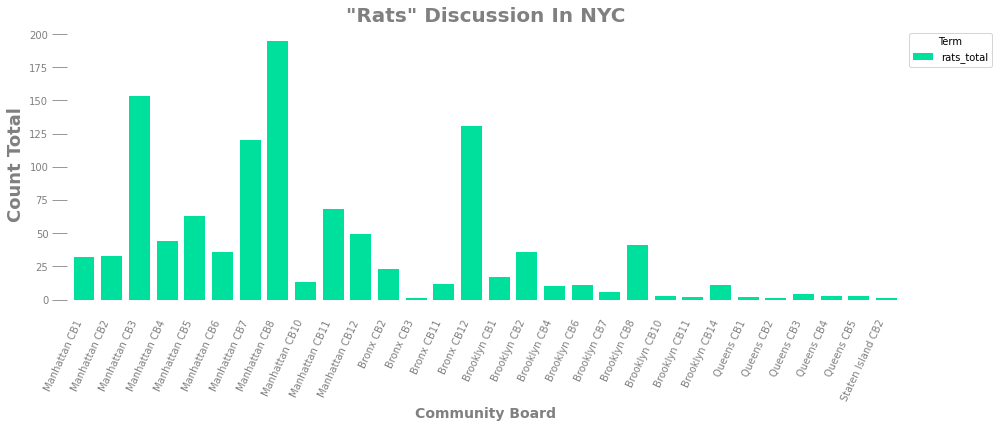

In [143]:
fig, ax = plt.subplots(figsize=(15, 5))
my_colors = ["#00E09D" ]

# make plot
topic_map.groupby('borocd')[topic_analyze]\
.sum().plot(kind='bar', ax=ax, width=.75,color= my_colors)
handles, labels = ax.get_legend_handles_labels()

# make legend
ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left', bbox_to_anchor=(1.00, 1))

# change axis
labels = [cb_name.replace('Community Board ', 'CB') for cb_name in topic_map['cd_full_title'].unique()]

ax.set_xticklabels(labels, rotation = 65, ha='right', minor=False)

ax.set_title(f'"{topic_analyze.strip("_total").title()}" Discussion In NYC', size=20, weight='bold', c='grey')
ax.set_ylabel('Count Total', size=18, weight='bold', c='grey')
ax.set_xlabel('Community Board', size=14, weight='bold', c='grey')
# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False,labelleft=True)
#ax.tick_params(left=False,labelleft=False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', colors='grey',size=15)
ax.tick_params(axis='y', colors='grey',size=15)

ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')


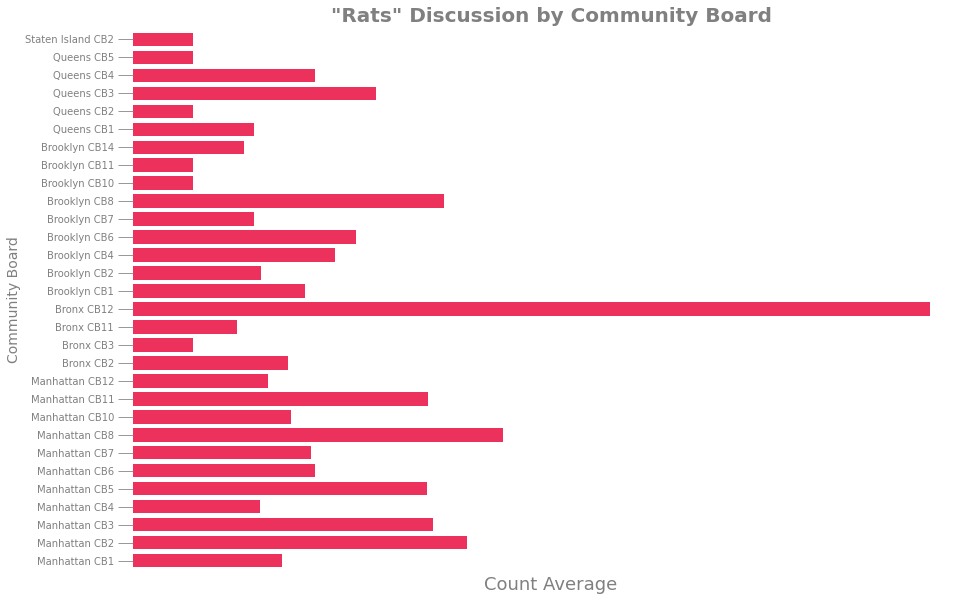

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
my_colors = ["#ED315D" ]

# make plot
topic_map.groupby('borocd')[topic_analyze]\
.mean().plot(kind='barh', ax=ax, width=.75,color= my_colors)
handles, labels = ax.get_legend_handles_labels()

# make legend
#ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left', bbox_to_anchor=(1.00, 1))

# change axis
labels = [cb_name.replace('Community Board ', 'CB') for cb_name in topic_map['cd_full_title'].unique()]

ax.set_yticklabels(labels, ha='right', minor=False)

ax.set_title(f'"{topic_analyze.strip("_total").title()}" Discussion by Community Board', size=20, weight='bold', c='grey')
ax.set_xlabel('Count Average', size=18, weight='medium', c='grey')
ax.set_ylabel('Community Board', size=14, weight='medium', c='grey')
# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False,labelleft=True)
#ax.tick_params(left=False,labelleft=False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
#ax.tick_params(axis='x', colors='grey',size=15)
ax.tick_params(axis='y', colors='grey',size=15)

#ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')
plt.savefig(f'{topic_dir}/by_CB_{datetime.date.today()}.jpg')

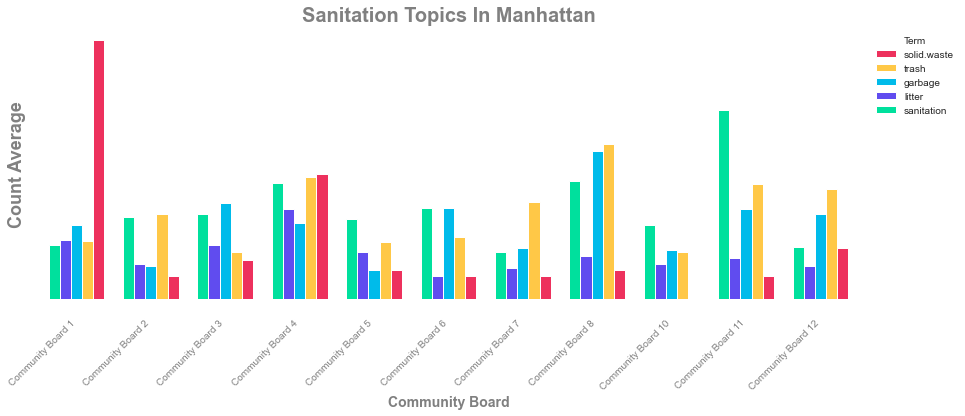

In [541]:
fig, ax = plt.subplots(figsize=(15, 5))
my_colors = ["#00E09D","#604CEF",  "#00BBEA", "#FFC847","#ED315D" ]

# make plot
man_cb.groupby('borocd')[case_study]\
.mean().plot(kind='bar', ax=ax, width=.75,color= my_colors)
handles, labels = ax.get_legend_handles_labels()

# make legend
ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left', bbox_to_anchor=(1.00, 1))

# change axis
labels = [cb_name.strip('Manhattan ') for cb_name in man_cb['cd_full_title'].unique()]

ax.set_xticklabels(labels, rotation = 45, ha='right', minor=False)

ax.set_title('Sanitation Topics In Manhattan', size=20, weight='bold', c='grey')
ax.set_ylabel('Count Average', size=18, weight='bold', c='grey')
ax.set_xlabel('Community Board', size=14, weight='bold', c='grey')
# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False,labelleft=True)
ax.tick_params(left=False,labelleft=False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', colors='grey',size=15)
ax.tick_params(axis='y', colors='grey',size=15)

ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')

#plt.savefig(f'Viz/Transportation/transitTypeMontly_v1_mean_{datetime.date.today()}.svg')
plt.show()

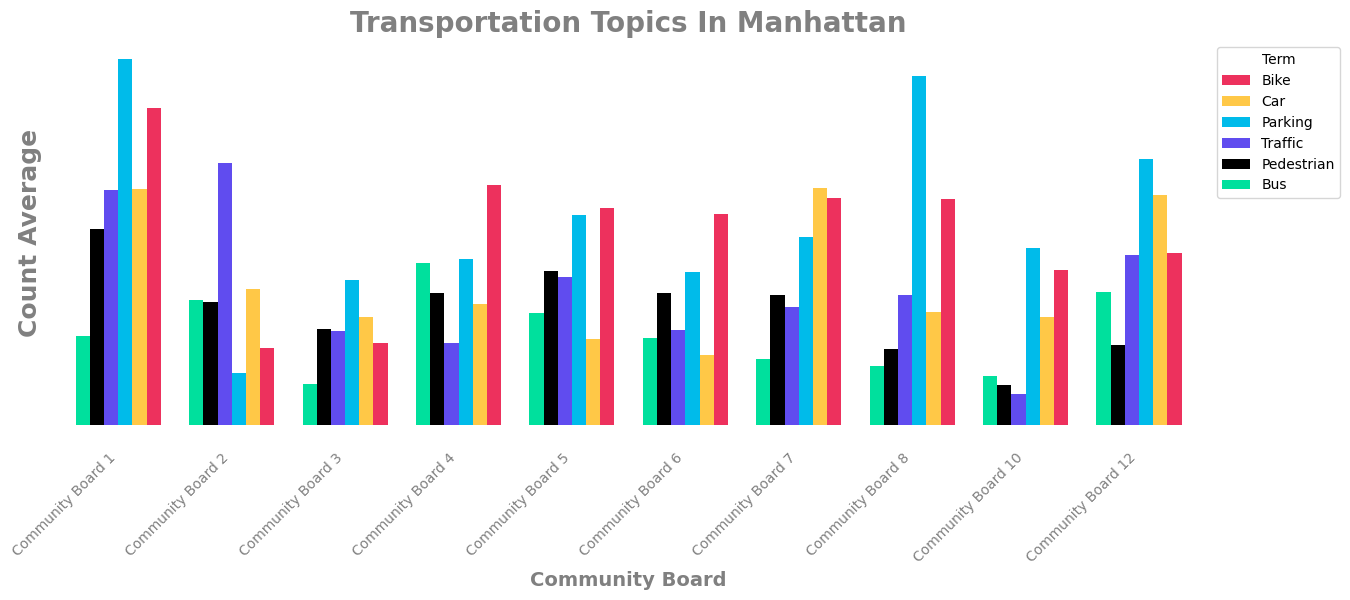

In [152]:
fig, ax = plt.subplots(figsize=(15, 5))
my_colors = ["#00E09D","#000000", "#604CEF",  "#00BBEA","#FFC847","#ED315D"]

# make plot
man_cb.groupby('borocd')[['Bus','Pedestrian','Traffic', 'Parking', 'Car', 'Bike']]\
.mean().plot(kind='bar', ax=ax, width=.75,color= my_colors)
handles, labels = ax.get_legend_handles_labels()

# make legend
ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left', bbox_to_anchor=(1.00, 1))

# change axis
labels = [cb_name.strip('Manhattan ') for cb_name in man_cb['cd_full_title'].unique()]

ax.set_xticklabels(labels, rotation = 45, ha='right', minor=False)

ax.set_title('Transportation Topics In Manhattan', size=20, weight='bold', c='grey')
ax.set_ylabel('Count Average', size=18, weight='bold', c='grey')
ax.set_xlabel('Community Board', size=14, weight='bold', c='grey')
# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False,labelleft=True)
ax.tick_params(left=False,labelleft=False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', colors='grey',size=15)
ax.tick_params(axis='y', colors='grey',size=15)

ax.xaxis.label.set_color('grey')
ax.yaxis.label.set_color('grey')

plt.savefig(f'Viz/Transportation/transitTypeMontly_v1_alltopics_{datetime.date.today()}.svg')
plt.show()

In [445]:
topic_map.groupby('borocd')[['Bike']].sum().reset_index().head(1)

borocd   Bike
0     101  590.0

In [451]:
test = topic_map.groupby([pd.Grouper(key='publish_date', freq='MS'),
                 pd.Grouper('borocd')
               ]).sum().reset_index()

In [456]:
test1 = topic_map[].groupby('borocd')[['Bike']].sum().reset_index()

In [457]:
test1.head(1)

borocd   Bike
0     101  590.0

In [ ]:
["#7C172B", "#F09596", "#ED315D", "#B83856", "#AB398B"]

In [ ]:
<3 ['#ffffff','#fde9ed','#fbd2db','#f69aaf','#f26f8d','#ef4e74','#ed315d']
['#FFFFFF','#ECFDF8','#D9FBF0','#A8F5DE','#70EEC8','#38E7B3','#00E09D']

In [920]:
1/7*2*2*2

1.1428571428571428

In [ ]:
[(0, '#FFFFFF'),(.15, '#fde9ed'), (.30, '#fbd2db'), (.50, '#f69aaf'),
(.70, '#f26f8d'), (.90, '#ef4e74'), (1, '#ed315d')]

In [86]:
from matplotlib.colors import LinearSegmentedColormap

In [87]:
# create simple linear colormap that maps grey to blue
bike_cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, '#FFFFFF'),(.15, '#fde9ed'), (.30, '#fbd2db'), (.60, '#f69aaf'),
(.80, '#f26f8d'),  (1, '#ed315d')])

In [88]:
bus_cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, '#FFFFFF'),(.15, '#ECFDF8'), (.30, '#D9FBF0'), (.60, '#A8F5DE'),
(.80, '#70EEC8'),  (1, '#00E09D')])

In [102]:
def map_one_topic_agg(topic, key_topic_df):
    import contextily as ctx
    filter_df = key_topic_df.groupby('borocd')[[topic]].sum().reset_index()
    topic_gdf = cb_geo.merge(filter_df, left_on='boro_cd', right_on='borocd', how='left')
    topic_gdf[topic].fillna(0,inplace=True)
    topic_gdf = topic_gdf.to_crs(epsg=3857)
    
    # remove staten island
    topic_gdf = topic_gdf[topic_gdf['boro_cd'] < 500]
    
    # dark background
    
    fig, axes = plt.subplots(figsize=(10, 8))
    import seaborn
    seaborn.set_style('white', {'legend.frameon':True})
    plt.style.use('seaborn-white')
    
    
    topic_gdf.plot(topic, edgecolor="grey",linewidth=.4, ax=axes, cmap="Oranges", 
                   legend=True, scheme='userdefined',classification_kwds={'bins':[0, 17, 49, 68, 153]},
                   legend_kwds={'loc': 'lower right'})
    
    #ctx.add_basemap(axes, url=ctx.providers.Stamen.TonerLite, zoom=12)
    
    #ax.axes.set_aspect('auto', 'datalim')
    axes.set_title(f'Total: {key_topic_df.shape[0]} Meetings Mention: "{topic_analyze.strip("_total").title()}"')
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    axes.axis('off')
    #legend = plt.legend(loc="upper right", edgecolor="black")
    """leg = axes.get_legend()
    leg.get_texts()[0].set_text('0')
    leg.get_texts()[1].set_text('0 to 25')
    leg.get_texts()[2].set_text('25 to 80')
    leg.get_texts()[3].set_text('80 to 170')
    leg.get_texts()[4].set_text('170 to 300')
    leg.get_texts()[5].set_text('300 to 350')
    leg.get_texts()[6].set_text('More than 350')
    leg.set_title(title="Count of Mentions")"""

    #leg.title('')
    fig.tight_layout()
    plt.savefig(f'{topic_dir}/word_map_{datetime.date.today()}.jpg')

In [293]:
topic_map.publish_date.min()

Timestamp('2015-04-14 00:00:00')

In [294]:
topic_map.publish_date.max()

Timestamp('2021-03-17 00:00:00')

In [295]:
565/1381

0.4091238233164374

In [ ]:
,classification_kwds={'bins':[0, 4, 14, 32, 46,76]}

In [ ]:
scheme='userdefined',classification_kwds={'bins':[0, 17, 49, 68, 153]},

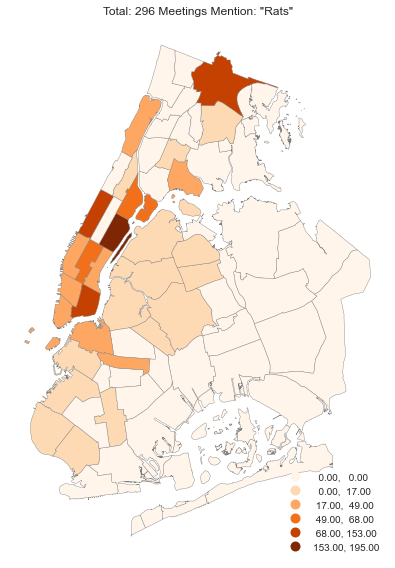

In [103]:
map_one_topic_agg(topic_analyze, topic_map)

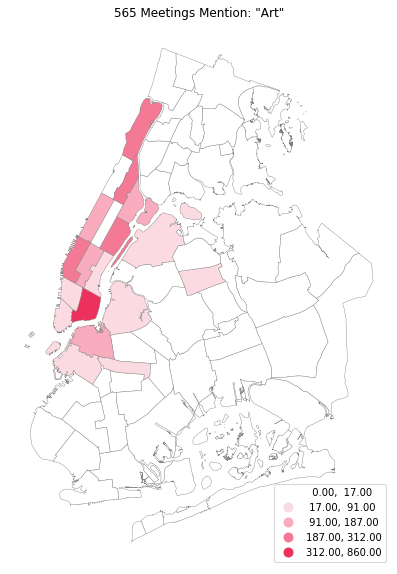

In [257]:
map_one_topic_agg('Art', topic_map)

highest car count = https://blockparty.studio/archive/?_id=5fe7e332539a4d487dc18d87

highest bus count = https://blockparty.studio/archive/?_id=5fe7e245539a4d487dc18bbd

In [91]:
trans_topics[trans_topics['bus']==trans_topics['bus'].max()]

video_url                       author publish_date  \
82  m70HxjpLWXQ  Manhattan Community Board 5   2020-08-24   

                                             title  \
82  Transportation & Environment Committee Meeting   

                                                topic  \
82  [[0.4927915036678314, 'Transportation'], [0.09...   

                                       fullTranscript  \
82  Luke Pj needs the link: okay, I'll resend, it ...   

                                           word_count   length topic_label  \
82  {'street': 19, 'bus': 23, 'bike': 18, 'traffic...  2:10:25   transport   

    topic_label_count                                        topic_count  \
82                429  {'transit': 10, 'transportation': 9, 'D.?o.?T'...   

    transit  traffic  cars?   bus  trucks?  pedestrians?  walking  vehicles?  \
82     10.0     53.0   14.0  72.0      NaN          46.0      1.0       23.0   

    transportation  D.?o.?T  bikes?  bicycles?  parking  crash  scooters?  \
82             9.0     48.0    66.0        4.0      9.0    1.0        NaN   

    subways?  CitiBikes?  buses  busway   mta  congestion  green.?ways?  \
82       2.0         1.0   26.0    25.0  11.0         5.0           NaN   

    Right.of.Way  automobiles?  bicyclists?  biking  cycling  motorcycles?  \
82           NaN           NaN          2.0     NaN      3.0           NaN   

    transport  crashes  trucking  street safety  cyclist  speed.zones?  \
82        NaN      NaN       1.0            NaN      4.0           NaN   

    Vision.Zero  
82          NaN

In [ ]:
# Time to Map it!

In [ ]:
# Maybe we need a baseline as a proportion of all meetings? 

In [682]:
topic_map[topic_map['borocd']==101].publish_date.min()

Timestamp('2020-06-18 00:00:00')

In [162]:
topic_map[topic_map['borocd']==302].head()

borocd               cd_full_title    video_url  \
619     302  Brooklyn Community Board 2  VOWykNjXjuw   
620     302  Brooklyn Community Board 2  g3Tucwr3C7E   
621     302  Brooklyn Community Board 2  BqU2zjddp24   
622     302  Brooklyn Community Board 2  zKeC8VkSvz0   
623     302  Brooklyn Community Board 2  hTjMrcmSMzo   

                         author publish_date  \
619  Brooklyn Community Board 2   2020-06-16   
620  Brooklyn Community Board 2   2020-09-10   
621  Brooklyn Community Board 2   2020-12-07   
622  Brooklyn Community Board 2   2020-08-27   
623  Brooklyn Community Board 2   2020-10-23   

                                                 title  \
619                       Parks & Recreation Committee   
620                                    General Meeting   
621  Health, Environment & Social Services Committe...   
622                                 Land Use Committee   
623                         Land Use Committee Meeting   

                                                 topic  \
619  [[0.9073856472969055, 'Parks'], [0.01812242530...   
620  [[0.3742085099220276, 'Health'], [0.1410507857...   
621  [[0.40640291571617126, 'Health'], [0.382737547...   
622  [[0.5279223322868347, 'Land Use'], [0.27960482...   
623  [[0.19621576368808746, 'Quality of Life'], [0....   

                                        fullTranscript  \
619  Five, and also for purposes of transparency, a...   
620  So, thank you.\nEveryone for participating in ...   
621  Recording has begun good evening, everyone in ...   
622  All right, I have 604 p.m, and thank you.\nEve...   
623  I get Irene's there, I understand and Karen I ...   

                                            word_count   length  Parking  DoT  \
619  {'parks': 5, 'moment': 2, 'park': 5, 'staff': ...  1:41:08      NaN  NaN   
620  {'school': 27, 'business': 3, 'health': 23, 'r...  1:46:07      NaN  2.0   
621  {'asthma': 21, 'health': 6, 'emergency': 6, 'e...  2:01:54      NaN  NaN   
622  {'building': 36, 'level': 26, 'parking': 19, '...  1:27:31     20.0  NaN   
623  {'block': 11, 'building': 6, 'units': 15, 'win...  1:18:31      3.0  NaN   

     CitiBike  Greenway  Vision Zero  Transportation  Bike  Scooter  Subway  \
619       NaN       NaN          NaN             0.0   2.0      0.0     0.0   
620       1.0       NaN          NaN             6.0  17.0      0.0     2.0   
621       NaN       NaN          NaN             1.0   1.0      0.0     0.0   
622       NaN       NaN          NaN             1.0   0.0      0.0     0.0   
623       NaN       NaN          NaN             0.0   1.0      0.0     0.0   

     Traffic  Street Safety  Bus  Car  Pedestrian  Truck  Bike_CitiBike  
619      0.0            0.0  0.0  2.0         4.0    0.0            2.0  
620      1.0            0.0  8.0  1.0         1.0    0.0           18.0  
621      0.0            0.0  1.0  1.0         0.0    0.0            1.0  
622      0.0            4.0  2.0  2.0         0.0    0.0            0.0  
623      1.0            0.0  0.0  4.0         0.0    0.0            1.0

https://color.adobe.com/create/color-wheel

In [ ]:
https://medium.com/qri-io/new-qri-dataset-s-nyc-real-time-traffic-speeds-c3e4c88f44be

In [177]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
newcmp = ListedColormap(["#FFFFFF","#00E09D",  "#00BBEA", "#604CEF","#ED315D",   "#000000" ])

In [496]:
def map_one_topic(topic, key_topic_df, start_date, end_date):
    filter_df = key_topic_df[(key_topic_df['publish_date']>start_date)\
         & (key_topic_df['publish_date']< end_date)]\
    .groupby('borocd')[[topic]].sum().reset_index()
    topic_gdf = cb_geo.merge(filter_df, left_on='boro_cd', right_on='borocd', how='left')
    topic_gdf[topic].fillna(0,inplace=True)
    
    # remove staten island
    topic_gdf = topic_gdf[topic_gdf['boro_cd'] < 500]
    
    # white background
    import seaborn
    seaborn.set_style('white', {'legend.frameon':True})
    plt.style.use('seaborn-white')
    
    fig, axes = plt.subplots(figsize=(15, 10))
    
    topic_gdf.plot(topic, edgecolor="grey",linewidth=.4, ax=axes, cmap='Purples', 
                   legend=False, scheme='naturalbreaks')
    
    #ax.axes.set_aspect('auto', 'datalim')
    axes.set_title(datetime.datetime.strptime(start_date, '%Y-%m-%d').strftime('%B %d, %Y') \
                   + f' - "{topic}" Mentioned {filter_df[topic].sum()} Time(s)', size=18, weight='bold', c='grey', y=-0.01)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    axes.axis('off')

    #fig.tight_layout()
    plt.savefig(f'Viz/Gifs/Hate/word_map{topic}_{start_date}_{end_date}.png')

In [397]:
week_range = pd.date_range('2020-11-22','2021-04-18', 
              freq='W').strftime("20%y-%m-%d").tolist()
l = week_range
step = 1
grp = 2
week_range_step = [(l+l)[x:x+grp] for x,_ in list(enumerate(l))[::step]]

In [ ]:
.strftime(

In [439]:
from datetime import date
for x, y in week_range_step[:-1]:
    print(x,y)
    print(datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%B %d, %Y'))

2020-11-22 2020-11-29
November 22, 2020
2020-11-29 2020-12-06
November 29, 2020
2020-12-06 2020-12-13
December 06, 2020
2020-12-13 2020-12-20
December 13, 2020
2020-12-20 2020-12-27
December 20, 2020
2020-12-27 2021-01-03
December 27, 2020
2021-01-03 2021-01-10
January 03, 2021
2021-01-10 2021-01-17
January 10, 2021
2021-01-17 2021-01-24
January 17, 2021
2021-01-24 2021-01-31
January 24, 2021
2021-01-31 2021-02-07
January 31, 2021
2021-02-07 2021-02-14
February 07, 2021
2021-02-14 2021-02-21
February 14, 2021
2021-02-21 2021-02-28
February 21, 2021
2021-02-28 2021-03-07
February 28, 2021
2021-03-07 2021-03-14
March 07, 2021
2021-03-14 2021-03-21
March 14, 2021
2021-03-21 2021-03-28
March 21, 2021
2021-03-28 2021-04-04
March 28, 2021
2021-04-04 2021-04-11
April 04, 2021
2021-04-11 2021-04-18
April 11, 2021


In [935]:
month_range = pd.date_range('2019-11-01','2021-03-01', 
              freq='MS').strftime("20%y-%m-%d").tolist()

In [516]:
l = month_range
step = 1
grp = 2
month_range_step = [(l+l)[x:x+grp] for x,_ in list(enumerate(l))[::step]]

In [518]:
month_range_step[0]

['2019-11-01', '2019-12-01']

In [498]:
#from itertools import izip

def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

In [468]:
for x, y in week_range_step[::-1]:
    print(x,y)

2020-11-22 2020-11-29
2020-11-29 2020-12-06
2020-12-06 2020-12-13
2020-12-13 2020-12-20
2020-12-20 2020-12-27
2020-12-27 2021-01-03
2021-01-03 2021-01-10
2021-01-10 2021-01-17
2021-01-17 2021-01-24
2021-01-24 2021-01-31
2021-01-31 2021-02-07
2021-02-07 2021-02-14
2021-02-14 2021-02-21
2021-02-21 2021-02-28
2021-02-28 2021-03-07
2021-03-07 2021-03-14
2021-03-14 2021-03-21
2021-03-21 2021-03-28
2021-03-28 2021-04-04
2021-04-04 2021-04-11
2021-04-11 2021-04-18
2021-04-18 2020-11-22


In [461]:
"""for x, y in month_range_step[::]:
    print(x,y)"""

'for x, y in month_range_step[::]:\n    print(x,y)'

In [471]:
import imageio
import os

In [466]:
import warnings
warnings.filterwarnings('ignore')

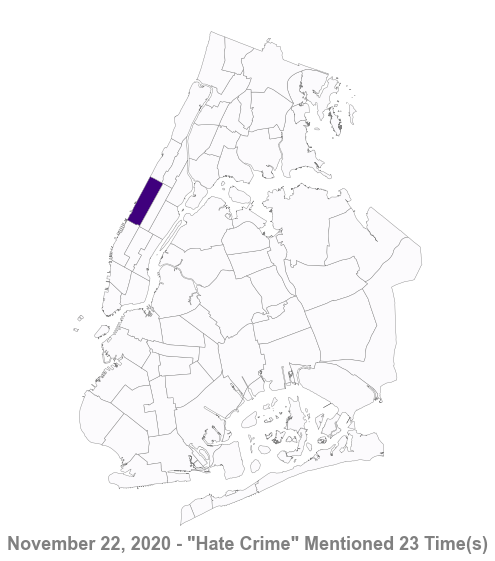

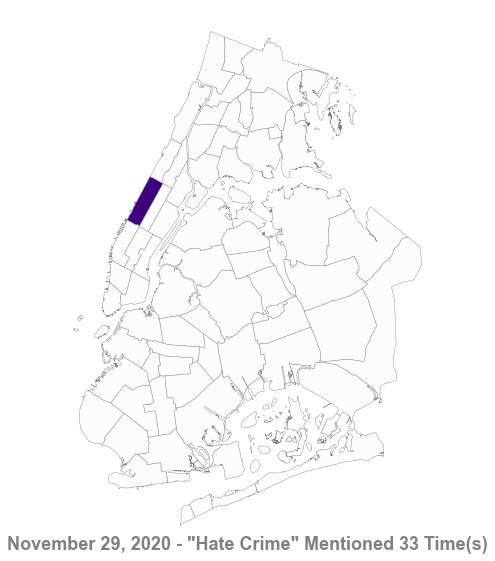

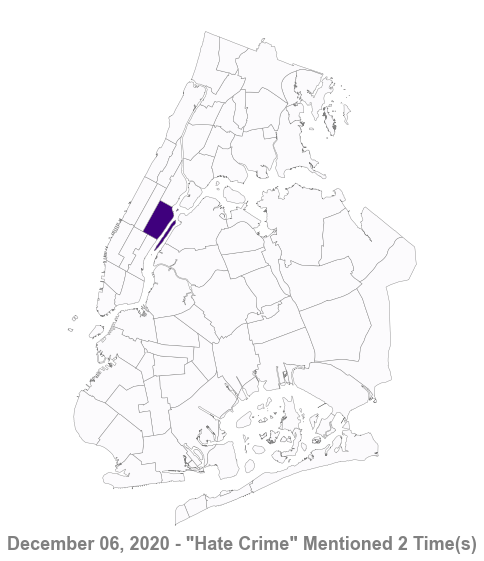

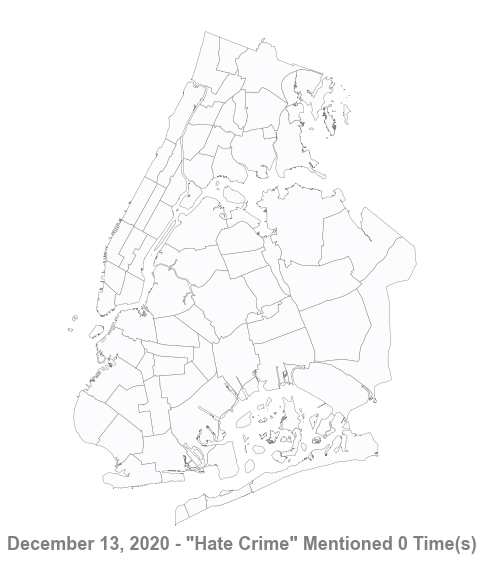

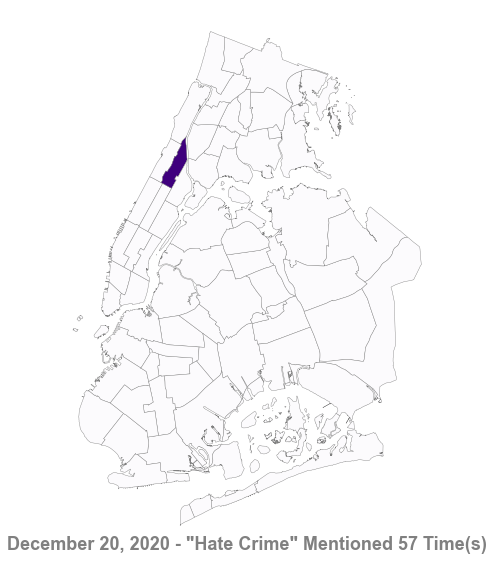

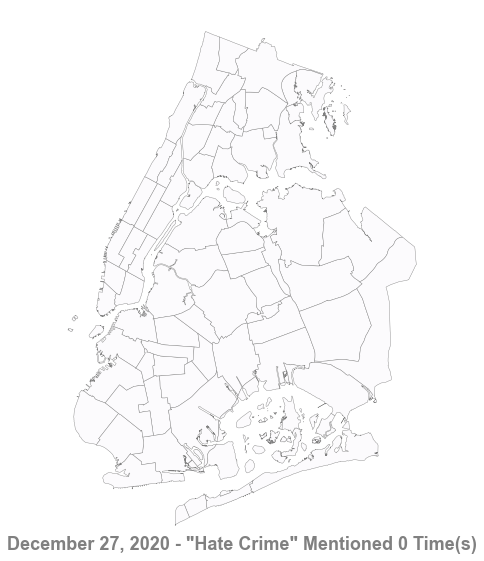

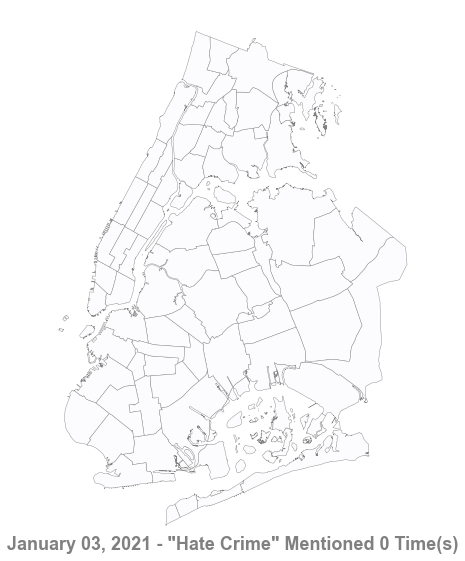

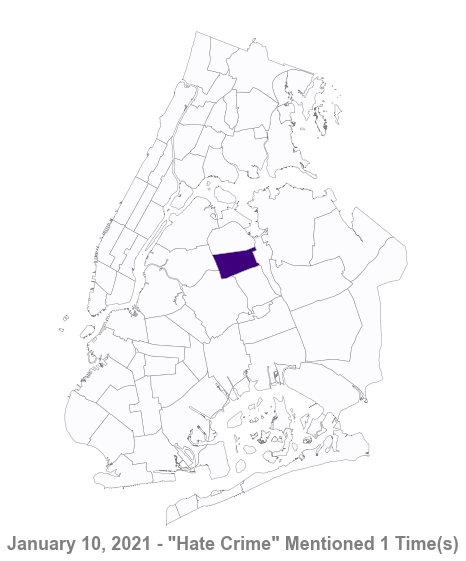

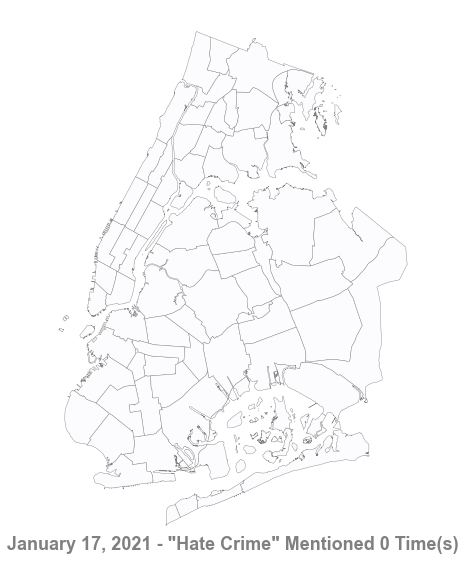

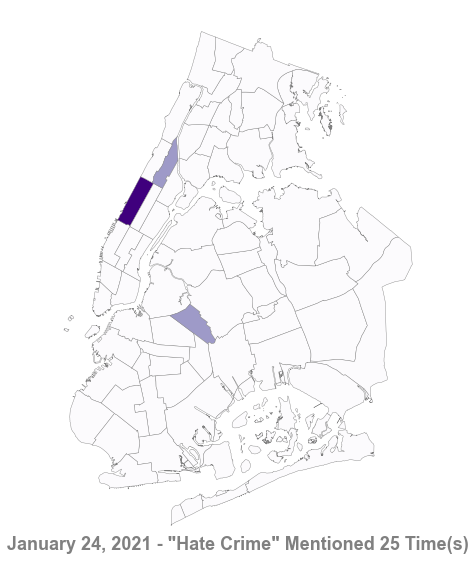

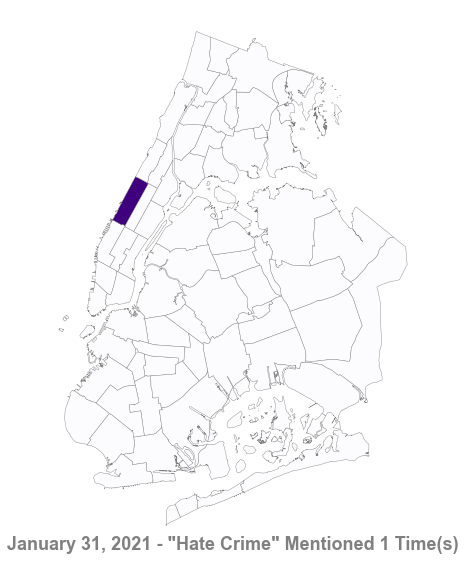

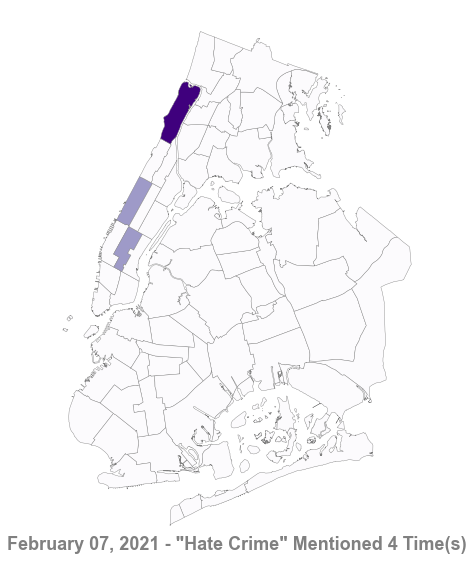

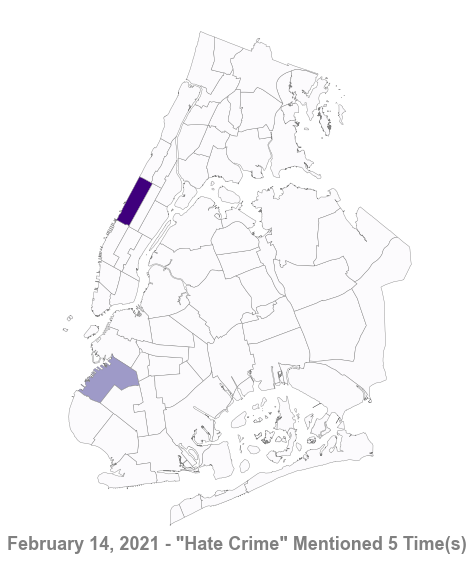

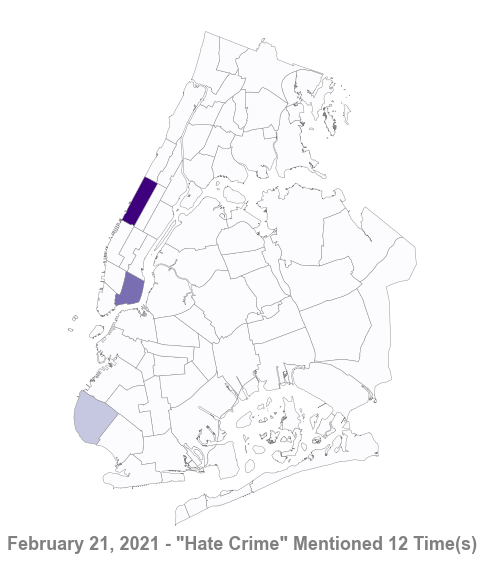

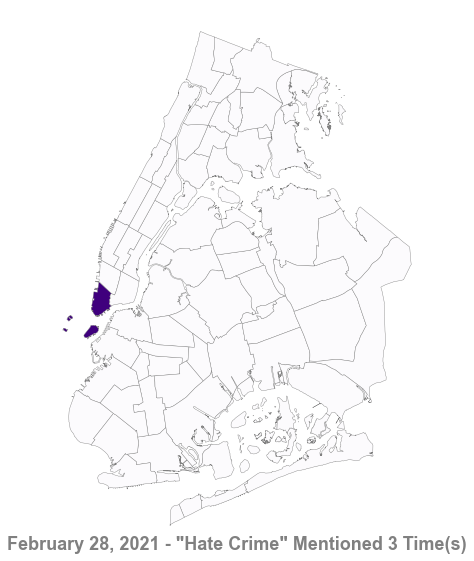

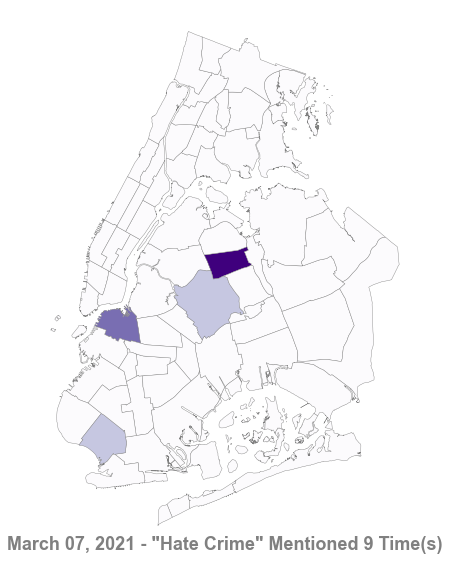

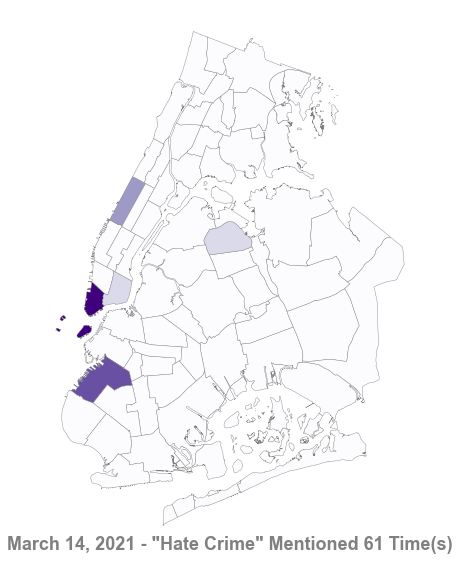

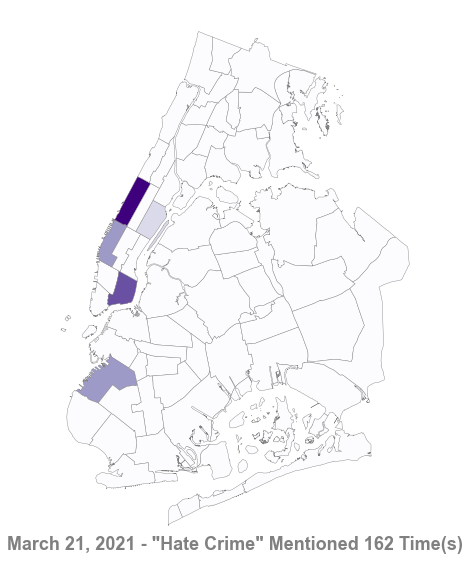

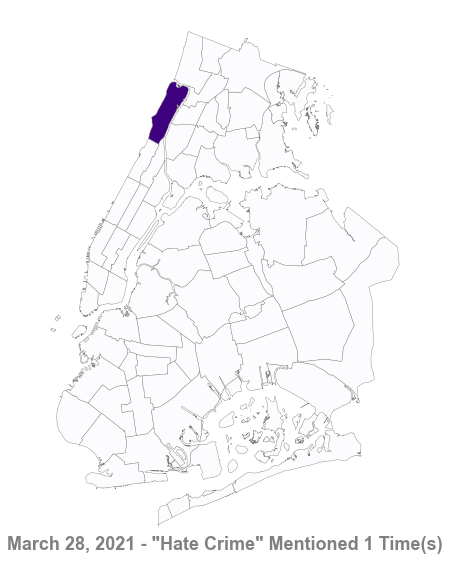

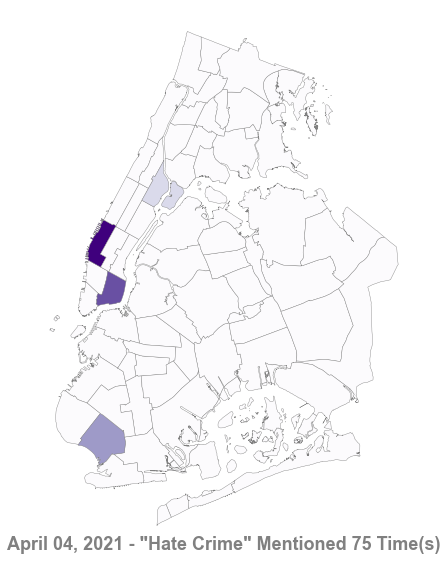

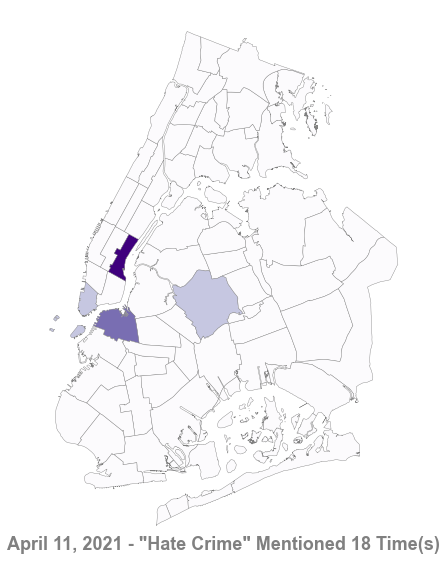

In [497]:
for x, y in week_range_step[:-1]:
    #print(x,y)
    map_one_topic('Hate Crime', topic_map, x, y)

In [476]:
directory = 'Viz/Gifs/Hate'

In [ ]:
os.path.join(subdir, file)

In [ ]:
frames = []

# Load each file into a list
for root, dirs, filenames in os.walk(indir):
  for filename in filenames:
    if filename.endswith(".jpg"):
        print(filename)
        frames.append(imageio.imread(indir + "/" + filename))


# Save them as frames into a gif 
exportname = "output.gif"
kargs = { 'duration': 5 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)

In [499]:
# Build GIF

frames = []

for filename in sorted(os.listdir(directory)):
    print(os.path.join(directory,filename))
    if filename.endswith(".png"):
        frames.append(imageio.imread(os.path.join(directory,filename)))

            
# Save them as frames into a gif 
exportname = "hatecrime.gif"
imageio.mimsave(exportname, frames, format='GIF', duration=1)          

Viz/Gifs/Hate/.ipynb_checkpoints
Viz/Gifs/Hate/word_mapHate Crime_2020-11-22_2020-11-29.png
Viz/Gifs/Hate/word_mapHate Crime_2020-11-29_2020-12-06.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-06_2020-12-13.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-13_2020-12-20.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-20_2020-12-27.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-27_2021-01-03.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-03_2021-01-10.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-10_2021-01-17.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-17_2021-01-24.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-24_2021-01-31.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-31_2021-02-07.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-07_2021-02-14.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-14_2021-02-21.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-21_2021-02-28.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-28_2021-03-07.png
Viz/Gifs/Hate/word_mapHate Crime_2021-03-07_2021-03-14.png
Viz/Gifs/Hate/word_mapH

In [486]:
# Build GIF
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in sorted(os.listdir(directory)):
        print(os.path.join(directory,filename))
        if filename.endswith(".png"):
            image = imageio.imread(os.path.join(directory,filename))
            writer.append_data(image)

Viz/Gifs/Hate/.ipynb_checkpoints
Viz/Gifs/Hate/word_mapHate Crime_2020-11-22_2020-11-29.png
Viz/Gifs/Hate/word_mapHate Crime_2020-11-29_2020-12-06.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-06_2020-12-13.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-13_2020-12-20.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-20_2020-12-27.png
Viz/Gifs/Hate/word_mapHate Crime_2020-12-27_2021-01-03.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-03_2021-01-10.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-10_2021-01-17.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-17_2021-01-24.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-24_2021-01-31.png
Viz/Gifs/Hate/word_mapHate Crime_2021-01-31_2021-02-07.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-07_2021-02-14.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-14_2021-02-21.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-21_2021-02-28.png
Viz/Gifs/Hate/word_mapHate Crime_2021-02-28_2021-03-07.png
Viz/Gifs/Hate/word_mapHate Crime_2021-03-07_2021-03-14.png
Viz/Gifs/Hate/word_mapH

In [502]:
topic_map[(topic_map['publish_date']>'2020-11-01')\
         & (topic_map['publish_date']< '2020-12-01')]\
    .groupby('borocd')[['Bike']].sum().reset_index()

borocd   Bike
0      101  214.0
1      103   39.0
2      104   59.0
3      105   13.0
4      106   35.0
5      107   66.0
6      108   94.0
7      110    5.0
8      112   31.0
9      202   12.0
10     211    0.0
11     301   66.0
12     302   15.0
13     306    4.0
14     308    1.0
15     310   59.0
16     314    2.0
17     401   16.0
18     403    5.0
19     404    7.0
20     405    2.0

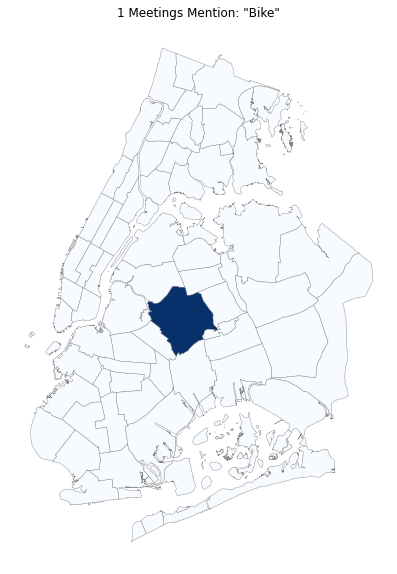

In [496]:
map_one_topic('Bike', topic_map, month_range[0],month_range[1])

In [ ]:
, classification_kwds={'bins':[0, 100, 200, 300, 400]}, scheme='naturalbreaks',
                  legend_kwds={'loc': 'lower right'}

In [144]:
topic_map['Bike_CitiBike'] = topic_map['Bike'].fillna(0) + topic_map['CitiBike'].fillna(0)

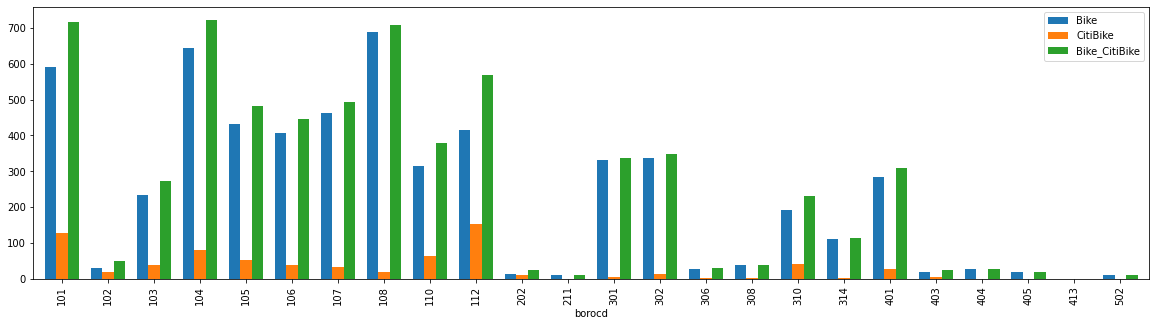

In [146]:
fig, axes = plt.subplots(figsize=(20, 5))
topic_map.groupby('borocd')[['Bike','CitiBike','Bike_CitiBike']].sum().plot(kind='bar', ax= axes, width=.75 )

In [978]:
plt.rcParams.update(plt.rcParamsDefault)

<AxesSubplot:xlabel='borocd'>

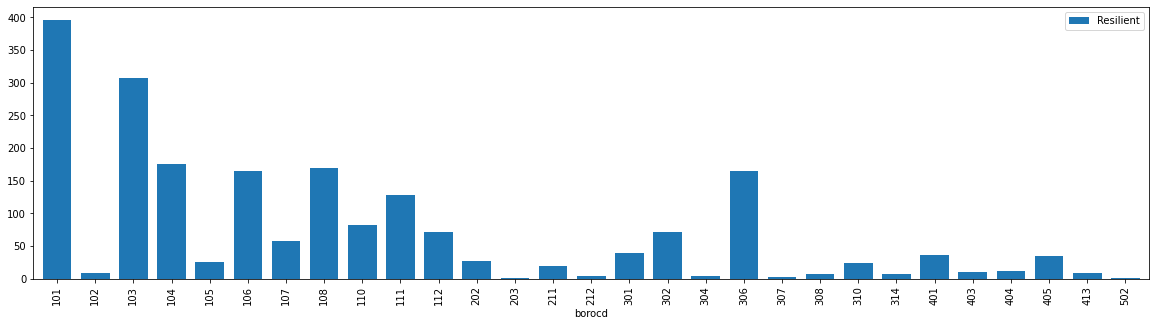

In [445]:
fig, axes = plt.subplots(figsize=(20, 5))
topic_map.groupby('borocd')[[
         'Resilient']].sum().plot(kind='bar', ax= axes, width=.75 )

Interesting relationship between Parking and Traffic, do these have collinearity?

In [68]:
b_group = topic_map.groupby([pd.Grouper(key='publish_date', freq='MS'),
                 pd.Grouper('borocd')
               ]).sum()

In [70]:
b_group.reset_index(inplace=True)

In [71]:
b_group['Bike_CitiBike'] = b_group['Bike']+b_group['CitiBike']

In [72]:
b_group.set_index('publish_date',inplace=True)

In [332]:
"""for i in range(len(b_group['borocd'].unique())):
    b_group[b_group['borocd']==b_group['borocd'].unique()[i]][['Parking','Subway']].plot(legend=True,lw=2)
    plt.title(b_group['borocd'].unique()[i])"""

"for i in range(len(b_group['borocd'].unique())):\n    b_group[b_group['borocd']==b_group['borocd'].unique()[i]][['Parking','Subway']].plot(legend=True,lw=2)\n    plt.title(b_group['borocd'].unique()[i])"

In [73]:
b_group.head(10)

borocd  Parking  DoT  CitiBike  Greenway  Vision Zero  \
publish_date                                                          
2019-11-01       405      1.0  0.0       0.0       0.0          0.0   
2020-01-01       405      0.0  3.0       0.0       0.0          0.0   
2020-02-01       102      4.0  8.0       0.0       0.0          0.0   
2020-02-01       405      7.0  6.0       0.0       0.0          0.0   
2020-03-01       102      0.0  0.0       0.0       0.0          0.0   
2020-03-01       103      1.0  4.0       0.0       0.0          0.0   
2020-03-01       211      2.0  0.0       0.0       0.0          0.0   
2020-03-01       405     17.0  1.0       0.0       0.0          0.0   
2020-04-01       103      1.0  4.0       0.0       0.0          0.0   
2020-04-01       306      0.0  6.0       0.0       0.0          0.0   

              Transportation  Bike  Scooter  Subway  Traffic  Street Safety  \
publish_date                                                                  
2019-11-01               4.0   2.0      0.0     0.0      4.0            0.0   
2020-01-01               8.0   1.0      0.0    13.0      1.0            0.0   
2020-02-01               2.0   3.0      0.0     4.0     16.0            1.0   
2020-02-01              24.0   3.0      0.0    23.0     32.0            1.0   
2020-03-01               7.0   0.0      0.0     1.0      7.0            0.0   
2020-03-01               6.0   8.0      0.0     1.0      5.0            0.0   
2020-03-01               4.0   2.0      0.0     0.0      0.0            0.0   
2020-03-01               7.0   0.0      0.0     4.0     18.0            0.0   
2020-04-01               6.0   1.0      0.0     0.0      5.0            0.0   
2020-04-01               9.0   1.0      0.0    12.0      0.0            0.0   

               Bus   Car  Pedestrian  Truck  Bike_CitiBike  
publish_date                                                
2019-11-01     1.0  11.0         3.0    2.0            2.0  
2020-01-01    31.0   9.0         2.0    3.0            1.0  
2020-02-01     3.0  15.0         3.0    4.0            3.0  
2020-02-01    80.0  36.0         4.0    6.0            3.0  
2020-03-01     1.0   1.0         3.0    0.0            0.0  
2020-03-01     0.0   2.0         0.0    0.0            8.0  
2020-03-01     3.0   1.0         3.0    0.0            2.0  
2020-03-01     9.0  21.0         1.0    4.0            0.0  
2020-04-01     5.0   1.0        10.0    3.0            1.0  
2020-04-01    12.0   1.0         1.0    0.0            1.0

In [440]:
b_group.head()

borocd  Parking  DoT  CitiBike  Greenway  Vision Zero  \
publish_date                                                          
2019-11-01       405      1.0  0.0       0.0       0.0          0.0   
2020-01-01       405      0.0  3.0       0.0       0.0          0.0   
2020-02-01       102      4.0  8.0       0.0       0.0          0.0   
2020-02-01       405      7.0  6.0       0.0       0.0          0.0   
2020-03-01       102      0.0  0.0       0.0       0.0          0.0   

              Transportation  Bike  Scooter  Subway  Traffic  Street Safety  \
publish_date                                                                  
2019-11-01               4.0   2.0      0.0     0.0      4.0            0.0   
2020-01-01               8.0   1.0      0.0    13.0      1.0            0.0   
2020-02-01               2.0   3.0      0.0     4.0     16.0            1.0   
2020-02-01              24.0   3.0      0.0    23.0     32.0            1.0   
2020-03-01               7.0   0.0      0.0     1.0      7.0            0.0   

               Bus   Car  Pedestrian  Truck  Bike_CitiBike  
publish_date                                                
2019-11-01     1.0  11.0         3.0    2.0            2.0  
2020-01-01    31.0   9.0         2.0    3.0            1.0  
2020-02-01     3.0  15.0         3.0    4.0            3.0  
2020-02-01    80.0  36.0         4.0    6.0            3.0  
2020-03-01     1.0   1.0         3.0    0.0            0.0

In [343]:
b_group['Bike'].describe()

count    180.000000
mean      31.316667
std       51.086352
min        0.000000
25%        1.000000
50%        6.500000
75%       43.000000
max      262.000000
Name: Bike, dtype: float64

In [350]:
b_group[b_group['borocd']==401][['Bike']].cumsum().values

array([[167.],
       [170.],
       [186.],
       [195.],
       [226.],
       [284.]])

In [346]:
for i in b_group['borocd'].unique():
    print(i)
    print(b_group[b_group['borocd']==i][['Bike']].cumsum().values[0])

405
[2.]
102
[3.]
103
[8.]
211
[2.]
306
[1.]
310
[0.]
403
[0.]
104
[22.]
110
[6.]
302
[3.]
314
[2.]
502
[0.]
101
[1.]
105
[80.]
107
[0.]
112
[98.]
308
[9.]
401
[167.]
404
[4.]
106
[3.]
108
[4.]
301
[3.]
413
[0.]
202
[12.]


104
110
302
101
105
107
112
401
106
108
301


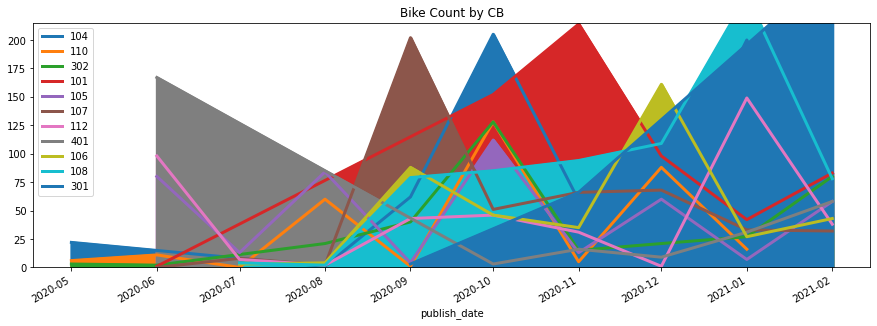

In [355]:
# Was it QCB1 with the Bike Spike?
fig, axes = plt.subplots(figsize=(15, 5))
thres = 280
top_cb = []
for cb in b_group['borocd'].unique():
    if b_group[b_group['borocd']==cb][['Bike']].sum().values[0] > thres:
        top_cb.append(cb)


for i in top_cb:
    print(i)
    b_group[b_group['borocd']==i][['Bike']].plot.area(label=i,lw=3, ax = axes)

    axes.legend(labels=top_cb)

plt.title('Bike Count by CB')
plt.show()    

In [ ]:
my_colors = ["#00E09D","#604CEF",  "#00BBEA", "#FFC847"]

# make plot
man_cb.groupby('borocd')[['Bus', 'Traffic', 'Parking', 'Car']]\

In [170]:
def cb_time_series(cb_id):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_prop_cycle(cycler('color', ["#00E09D","#000000", "#604CEF",  "#00BBEA","#FFC847","#ED315D"]) +
                   cycler('lw', [1, 2, 3, 4,5,6]))

    b_group[b_group['borocd']==cb_id][['Bus','Pedestrian','Traffic', 'Parking', 'Car', 'Bike']]\
    .plot.area(legend=True,linewidth=.1, stacked=True, ax = ax)
    
    cb_name = topic_map[topic_map['borocd']==cb_id]['author'].values[0]
    ax.set_title(f'{cb_name} \n Transportation Topics (by Month)', size=20, weight='bold', c='grey')
    ax.set_ylabel('Count Total ', size=18, weight='bold', c='grey')
    ax.set_xlabel('Date', size=14, weight='bold', c='grey')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False,labelleft=False)
    ax.spines['bottom'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left')
    ax.xaxis.label.set_color('grey')
    ax.tick_params(axis='x', colors='grey')
    # make legend
    ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left', bbox_to_anchor=(1.00, 1))

    # Only show ticks on the left and bottom spines
    #ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    monthyearFmt = mdates.DateFormatter('%B')
    ax.xaxis.set_major_formatter(monthyearFmt)
    
    #plt.savefig(f'Viz/Transportation/timeseries{cb_id}_{datetime.date.today()}.svg')
    plt.show()

In [147]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [101]:
import matplotlib.dates as mdates
import numpy as np
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter



In [ ]:
.strftime("%d-%B")

In [ ]:
cb_time_series(401)

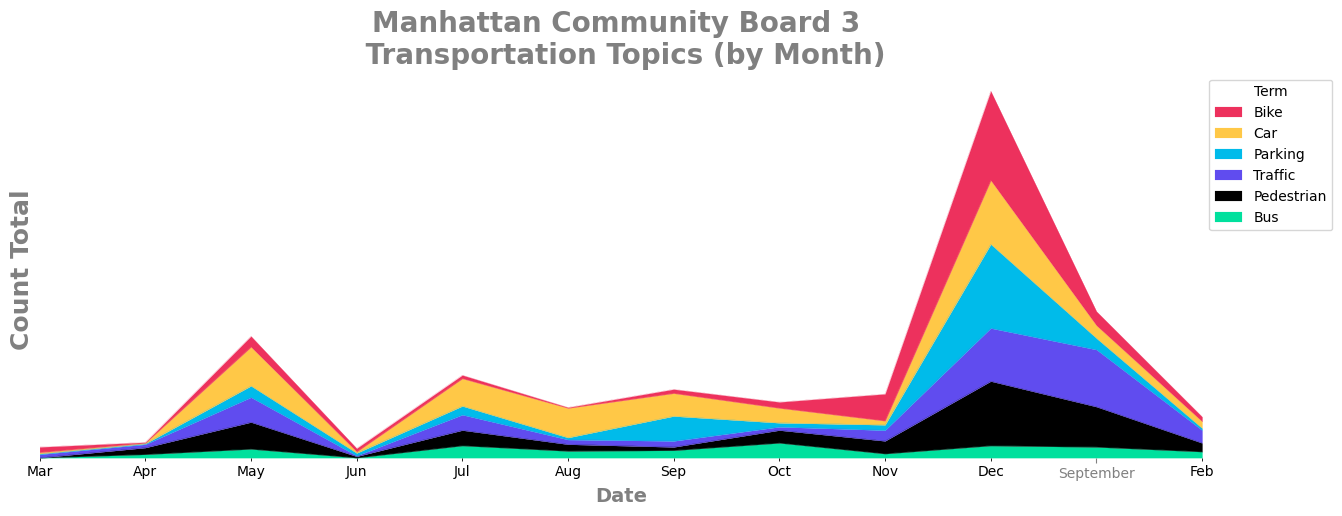

In [172]:
cb_time_series(103)

In [ ]:
my_colors = ["#00E09D","#604CEF",  "#00BBEA", "#FFC847"]

# make plot
man_cb.groupby('borocd')[['Bus', 'Traffic', 'Parking', 'Car']]\

In [165]:
def cb_time_series_bus(cb_id):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_prop_cycle(cycler('color', ["#00E09D","#604CEF",  "#00BBEA", "#FFC847"]) +
                   cycler('lw', [1, 2, 3, 4]))

    b_group[b_group['borocd']==cb_id][['Bus', 'Traffic', 'Parking', 'Car']]\
    .plot(legend=True,linewidth=5,  ax = ax)
    
    cb_name = topic_map[topic_map['borocd']==cb_id]['author'].values[0]
    ax.set_title(f'{cb_name} \n Transportation Topics (by Month)', size=20, weight='bold', c='grey')
    ax.set_ylabel('Count Total ', size=18, weight='bold', c='grey')
    ax.set_xlabel('Date', size=14, weight='bold', c='grey')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False,labelleft=False)
    ax.spines['bottom'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left')
    ax.xaxis.label.set_color('grey')
    #ax.tick_params(axis='x', colors='grey')
    # make legend
    ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left', bbox_to_anchor=(1.00, 1))

    # Only show ticks on the left and bottom spines
    #ax.yaxis.set_ticks_position('left')
    
    plt.savefig(f'Viz/Transportation/timeseries_BUS_not_area{cb_id}_{datetime.date.today()}.svg')
    plt.show()

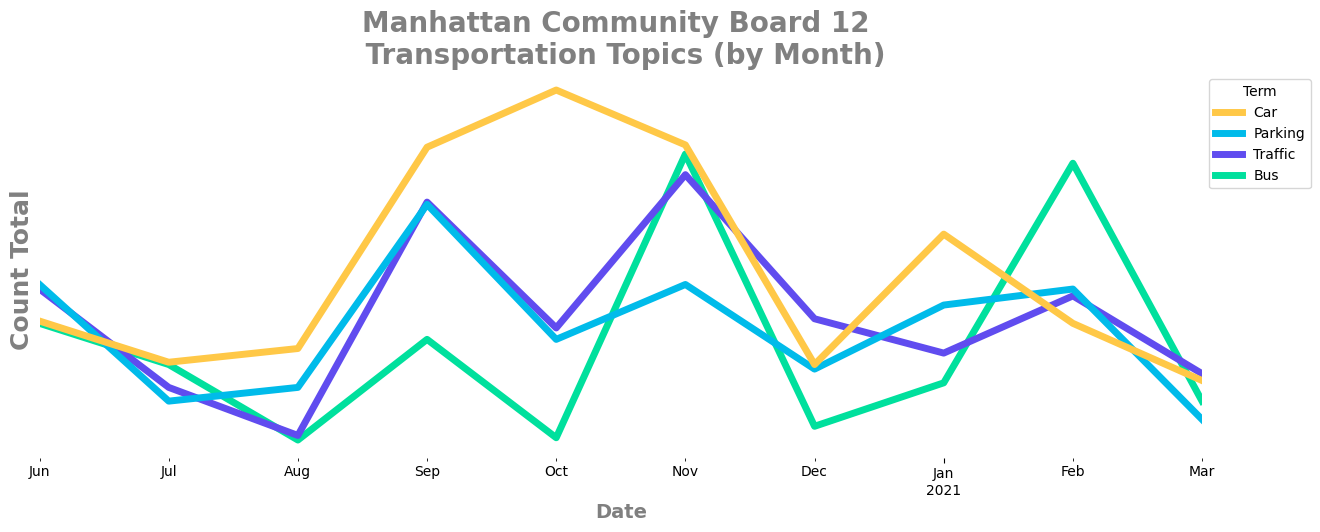

In [166]:
cb_time_series_bus(112)

In [ ]:

small_subset.plot.area(ax=ax, linewidth=.1, stacked=True)
ax.set_title('Transportation Topics (by Month)', size=20, weight='bold', c='grey')
ax.set_ylabel('Count Total ', size=18, weight='bold', c='grey')
ax.set_xlabel('Date', size=14, weight='bold', c='grey')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False,labelleft=False)
ax.spines['bottom'].set_color('grey')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Term', loc='upper left')
ax.xaxis.label.set_color('grey')
#ax.tick_params(axis='x', colors='grey')

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.legend(loc='upper left', prop={'size': 14})    
plt.savefig(f'Viz/Transportation/transitTypeMontly_{datetime.date.today()}.svg')

Text(0.5, 1.0, '401')

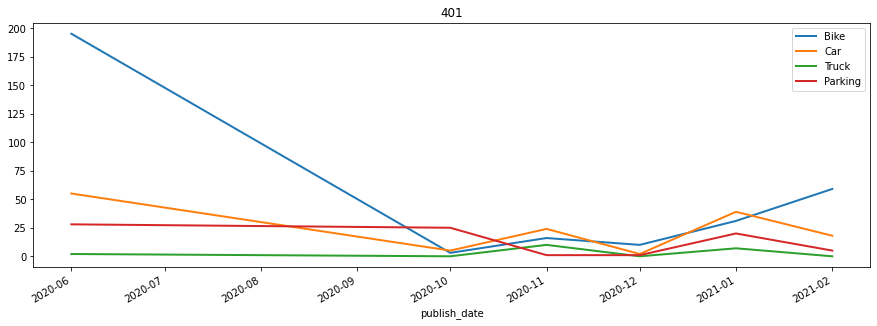

In [74]:
fig, axes = plt.subplots(figsize=(15, 5))
cb_id = 401
b_group[b_group['borocd']==cb_id][['Bike','Car','Truck','Parking']].plot(legend=True,lw=2, ax = axes)
plt.title(cb_id)

Text(0.5, 1.0, '401 CB1 Q')

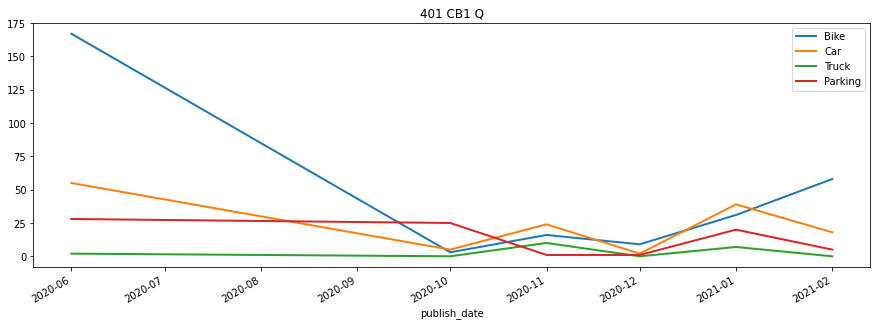

In [272]:
fig, axes = plt.subplots(figsize=(15, 5))
b_group[b_group['borocd']==401][['Bike','Car','Truck','Parking']].plot(legend=True,lw=2, ax = axes)
plt.title('401 CB1 Q')

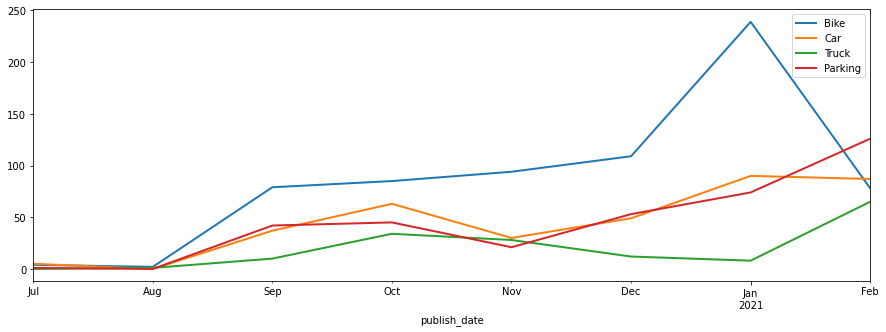

In [271]:
fig, axes = plt.subplots(figsize=(15, 5))
b_group[b_group['borocd']==108][['Bike','Car','Truck','Parking']].plot(legend=True,lw=2, ax = axes)

In [310]:
def timeSeriesTopic(topic_list):
    fig, axes = plt.subplots(figsize=(15, 5))
    b_group[b_group['borocd']==112][topic_list].plot(lw=2, ax= axes,c='r')
    b_group[b_group['borocd']==104][topic_list].plot(lw=2, ax= axes,c='b')
    b_group[b_group['borocd']==108][topic_list].plot(lw=2, ax= axes,c='g')
    plt.title(topic_list)
    plt.show()

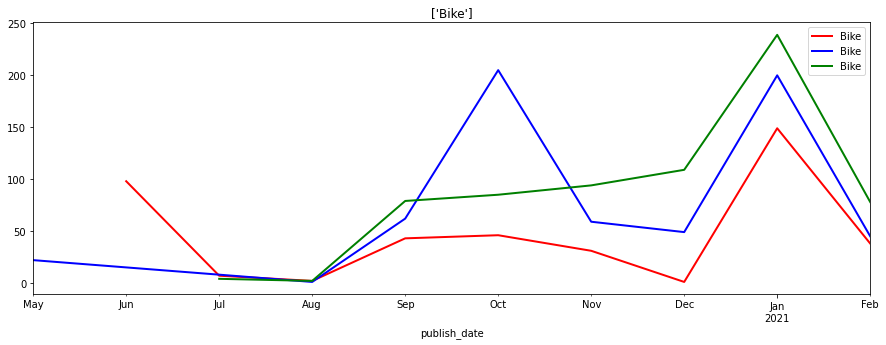

In [315]:
timeSeriesTopic(['Bike'])

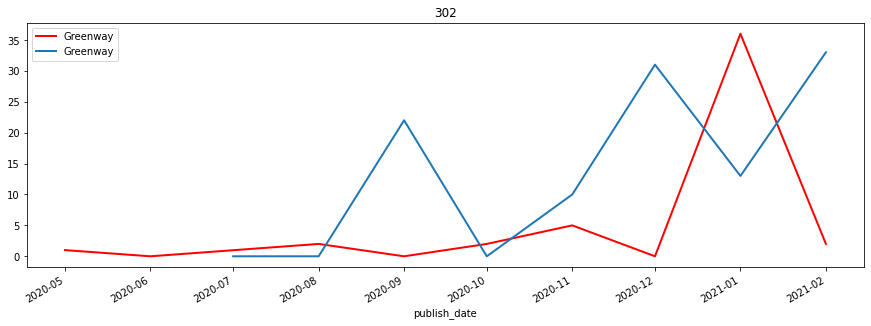

In [199]:
fig, axes = plt.subplots(figsize=(15, 5))
b_group[b_group['borocd']==302][['Greenway']].plot(lw=2, ax= axes, c='r')
b_group[b_group['borocd']==106][['Greenway']].plot(lw=2, ax= axes)
plt.title('302')
plt.show()

In [160]:
topic_map['publish_date'] = pd.to_datetime(topic_map['publish_date'])  

In [165]:
topic_map[topic_map['Greenway']==topic_map['Greenway'].max()]

borocd               cd_full_title    video_url  \
663     302  Brooklyn Community Board 2  HuaMN6FnI6E   

                         author publish_date  \
663  Brooklyn Community Board 2   2021-01-14   

                                    title  \
663  Parks & Recreation Committee Meeting   

                                                 topic  \
663  [[0.641738772392273, 'Parks'], [0.097446672618...   

                                        fullTranscript  \
663  The Brooklyn community board 2 parks and Recre...   

                                            word_count   length  Parking  DoT  \
663  {'bathroom': 16, 'park': 10, 'project': 4, 'gr...  1:56:23      6.0  2.0   

     CitiBike  Greenway  Vision Zero  Transportation  Bike  Scooter  Subway  \
663       NaN      33.0          NaN             2.0   8.0      0.0     0.0   

     Traffic  Street Safety  Bus  Car  Pedestrian  Truck  Bike_CitiBike  
663      0.0            0.0  0.0  2.0         3.0    1.0            8.0

In [ ]:
df[df.topic_count == {}]

In [120]:
df[df.topic_count == {}]

video_url                        author publish_date  \
3    n96Xzbg7Fls  Manhattan Community Board 12   2020-11-06   
214  f2nqFw0_4I0  Manhattan Community Board 12   2020-11-11   
316  ZpSYiF7cjbs   Manhattan Community Board 8   2021-01-30   
373  TBTAeV0jGFE   Manhattan Community Board 1   2021-02-22   
491  _AJszAb2JP8   Manhattan Community Board 8   2020-06-22   

                                      title  \
3                      Health & Environment   
214  Business Development Committee Meeting   
316        Social Justice Committee Meeting   
373                   Executive Committee –   
491            Youth Committee Zoom Meeting   

                                                 topic  \
3    [[0.616631269454956, 'Health'], [0.03978963568...   
214  [[0.15718063712120056, 'Employment'], [0.11110...   
316  [[0.173096165060997, 'Landmarks'], [0.12867909...   
373  [[0.49472182989120483, 'Elections'], [0.222409...   
491  [[0.17430277168750763, 'Education'], [0.116158...   

                                        fullTranscript  \
3    And with the restaurants and this open street ...   
214  Hey Ashley, I'm so sorry, I thought we were on...   
316  So maybe I'll ask you to do it again sure wait...   
373  Tammy we are now recording okay, that should w...   
491  Just for the recording this is the Monday June...   

                                            word_count   length topic_label  \
3    {'services': 15, 'health': 15, 'fireworks': 36...  3:07:09      upzone   
214  {'businesses': 14, 'business': 16, 'partners':...  1:33:27      upzone   
316  {'officials': 25, 'capital': 4, 'police': 6, '...  1:52:45      upzone   
373  {'elections': 4, 'island': 6, 'street': 5, 'ba...  1:37:00      upzone   
491  {'lives': 13, 'racism': 8, 'school': 13, 'ally...  1:38:46      upzone   

     topic_label_count topic_count  affordable.housing  asian  up.?zonings?  \
3                    1          {}                 NaN    NaN           NaN   
214                  1          {}                 NaN    NaN           NaN   
316                  1          {}                 NaN    NaN           NaN   
373                  1          {}                 NaN    NaN           NaN   
491                  1          {}                 NaN    NaN           NaN   

     chinese  hate.crimes?  up.zoned?  hate.incidents?  
3        NaN           NaN        NaN              NaN  
214      NaN           NaN        NaN              NaN  
316      NaN           NaN        NaN              NaN  
373      NaN           NaN        NaN              NaN  
491      NaN           NaN        NaN              NaN

In previous times, we've been doing the breaking bread building bonds initiative. We have several partners in regards to this initiative, where we have dinners of 10 to 12. People of various backgrounds sit together and discuss their differences and the commonalities and I'm happy to say some of the CB2 members have participated, but I don't know if you realize that one of our partners is the chinese-american planning councils project reach, which does a lot of work in terms of anti-racism and holding classes and so forth.

https://blockparty.studio/Archive/?_id=604a99080ae4135e852a0c63

In [450]:
df.sort_values(['topic_label_count', 'publish_date'], ascending=[False,False]).head(20)

video_url                        author publish_date  \
2    g1gcT-cVsWM   Manhattan Community Board 8   2020-12-10   
45   lSVYyCiArvI   Manhattan Community Board 6   2020-11-24   
144  8Vk90m_2VE4  Manhattan Community Board 10   2020-12-21   
3    Tsa95F4R0oY   Manhattan Community Board 1   2020-12-09   
242  g3G0KU5RYhU  Manhattan Community Board 11   2021-02-08   
286  mSDL1Z1pdp8   Manhattan Community Board 4   2020-11-17   
116  G0Bdp46g2xY   Manhattan Community Board 3   2020-11-18   
179  hs2D_RzLLfk   Manhattan Community Board 4   2020-11-17   
19   YPGGW5n1Z4A    Brooklyn Community Board 6   2020-12-03   
18   0bASeaH6NqQ   Manhattan Community Board 1   2020-12-10   
150  9sSPIaEI4Po    Brooklyn Community Board 2   2020-11-20   
63   tJXwtb1-0oc   Manhattan Community Board 8   2020-11-13   
57   2Fuw4qDn_as   Manhattan Community Board 4   2020-12-22   
118  dZLhbcu4egk   Manhattan Community Board 1   2020-12-16   
143  Ly_DyNmo1DA      Queens Community Board 1   2020-12-16   
54   ftYb37qc56M    Brooklyn Community Board 6   2020-11-17   
169  EMzIaa39rX4  Manhattan Community Board 12   2021-01-08   
149  S3NKv99hKXI      Queens Community Board 5   2020-11-19   
120  U4Qdet8Y3UE   Manhattan Community Board 1   2020-10-30   
31   8kuj8416-6E   Manhattan Community Board 3   2020-10-22   

                                                 title  \
2                           Land Use Committee Meeting   
45   Manhattan Community Board Six - Land Use & Wat...   
144                         Land Use Committee Meeting   
3                   Environmental Protection Committee   
242  Environment, Open Space & Parks Committee Meeting   
286                         Chelsea Land Use Committee   
116             Manhattan - Land Use Committee Meeting   
179          MCB4 - Chelsea Land Use Committee Webinar   
19              Brooklyn CBLandmarks/ Land Use Meeting   
18                         Battery Park City Committee   
150                         Land Use Committee Meeting   
63                             Parks Committee Meeting   
57                                    Chelsea Land Use   
118             Waterfront, Parks & Cultural Committee   
143                          Queens Full Board Meeting   
54   Brooklyn Community Board Economic, Waterfront,...   
169                                           Land Use   
149                                    Monthly Meeting   
120                 Environmental Protection Committee   
31           Manhattan -NYCHA and Section Subcommittee   

                                                 topic  \
2    [[0.541478157043457, 'Zoning'], [0.09162350744...   
45   [[0.5335935950279236, 'Zoning'], [0.0807763934...   
144  [[0.6580401659011841, 'Zoning'], [0.0573235787...   
3    [[0.6098386645317078, 'Zoning'], [0.0608458034...   
242  [[0.4925993084907532, 'Parks'], [0.35880997776...   
286  [[0.7333296537399292, 'Zoning'], [0.0669254213...   
116  [[0.475576251745224, 'Zoning'], [0.14812316000...   
179  [[0.5490630865097046, 'Zoning'], [0.0787656903...   
19   [[0.6660201549530029, 'Zoning'], [0.0538692548...   
18   [[0.46255871653556824, 'Parks'], [0.2585974335...   
150  [[0.5420689582824707, 'Employment'], [0.069651...   
63   [[0.46040165424346924, 'Zoning'], [0.353121966...   
57   [[0.6570473313331604, 'Zoning'], [0.0821606665...   
118  [[0.599532961845398, 'Parks'], [0.133818387985...   
143  [[0.4987127184867859, 'Zoning'], [0.0884551703...   
54   [[0.5881285667419434, 'Housing'], [0.261533141...   
169  [[0.4348023235797882, 'Zoning'], [0.3269341588...   
149  [[0.5113340616226196, 'Zoning'], [0.0811786204...   
120  [[0.13011297583580017, 'Land Use'], [0.1287710...   
31   [[0.39099931716918945, 'Infrastructure'], [0.1...   

                                        fullTranscript  \
2    Foreign me, okay, will tell me when it's a goo...   
45   And I guess we're ready one. Second, we're goi...   
144  Good evening, Kevin and Shawty good evening ca...   
3    Now, rec

In [ ]:
V2oIE4WO2kw

In [448]:
def find_signl(video_url):
    key = "9PDTFfeZI86y8uDSs4Mxd3Ar2O19tsM17EYgr378"
    import requests 

    url = "https://signals-prod.ent.sdy.ai/signals"

    headers = {"x-api-key": key, "Content-Type": "application/json"}
    
    full_transcript = topic_map[(topic_map['video_url']==video_url)]['fullTranscript'].values[0]
    
    payload = {"text": full_transcript}
    
    response = requests.post(url, headers=headers, json=payload)
    if not response.ok:
        raise Exception
        
    data = response.json()
    output = "\n \n".join([i.get('context').get('before').get('text') + i.get('text')\
                    +i.get('context').get('after').get('text')  for i in data.get('signals')])
    return output

In [451]:
print(find_signl('g1gcT-cVsWM'))

Is that what you're about to tell us you went away faster than I? Could ask don't meet you?We're super close I think some people just joined, so we were at 22 last time, I checked, give it another minute or two yeah. You can give it a minute. Okay, I mean you can also start.
 
If we have time so, the public won't have the opportunity to comment on anything other than what is presented before it today in terms of procedure. It's the same as every other committee meeting and the full board meetings.If you click on the participants button at the bottom of your screen, which right now has the number 54 next to it , you'll see a list of people attending the meeting at the bottom of that list is a little virtual hand. That says raise hand if you click on that you'll be pushed to the top of the pile and you'll be able to comment so we'll see your hands in order and then I will call on you in the order in which you raise your hands, am I missing anything. Will we have a quorum now?
 
Official 

In [530]:
topic_map[(topic_map['borocd']==112)& (topic_map['Bike']>1) & (topic_map['publish_date']>'2021-01-01')\
         & (topic_map['publish_date']<'2021-01-30')].sort_values(by='publish_date')

borocd                 cd_full_title    video_url  \
534     112  Manhattan Community Board 12  ZTcVAtnGMi8   
532     112  Manhattan Community Board 12  ytOa7dKRNkM   
542     112  Manhattan Community Board 12  huAdZ8GBHiI   
539     112  Manhattan Community Board 12  fLxvs2UHTGY   
541     112  Manhattan Community Board 12  5emlTcVpwtk   
543     112  Manhattan Community Board 12  etKrWGK0Yak   

                           author publish_date  \
534  Manhattan Community Board 12   2021-01-05   
532  Manhattan Community Board 12   2021-01-08   
542  Manhattan Community Board 12   2021-01-08   
539  Manhattan Community Board 12   2021-01-13   
541  Manhattan Community Board 12   2021-01-20   
543  Manhattan Community Board 12   2021-01-27   

                                          title  \
534  Traffic & Transportation Committee Meeting   
532                        Health & Environment   
542             Public Safety Committee Meeting   
539          Parks & Cultural Affairs Committee   
541                         Executive Committee   
543                     Virtual General Meeting   

                                                 topic  \
534  [[0.4592602849006653, 'Transportation'], [0.11...   
532  [[0.5334219336509705, 'Health'], [0.1120441406...   
542  [[0.4150855839252472, 'Safety'], [0.2076177448...   
539  [[0.8266367316246033, 'Parks'], [0.04279527068...   
541  [[0.341253399848938, 'Health'], [0.25912109017...   
543  [[0.3145398199558258, 'Education'], [0.2578567...   

                                        fullTranscript  \
534  But it's not quick enough. We have to get to W...   
532  Oh man, so are you coming up to Moat's face I ...   
542  Foreign, hello, everyone welcome.\nWe will be ...   
539  Oh now, foreign yeah oops are we live, I'm jus...   
541  I'm eating so my camera is off for the moment....   
543  Hello, everyone, hi Roman.\nHow are you oh goo...   

                                            word_count   length  Parking  \
534  {'street': 19, 'stations': 14, 'bikes': 11, 's...  2:27:25     14.0   
532  {'vaccine': 31, 'vaccines': 11, 'state': 11, '...  3:13:57      NaN   
542  {'parole': 17, 'bill': 6, 'state': 13, 'prison...  1:54:49     15.0   
539  {'field': 26, 'soccer': 11, 'fence': 7, 'park'...  1:55:01      NaN   
541  {'business': 8, 'task': 4, 'services': 7, 'for...  2:19:00      NaN   
543  {'rest': 35, 'business': 6, 'budget': 7, 'stat...  3:33:10     15.0   

      DoT  CitiBike  Greenway  Vision Zero  Transportation   Bike  Scooter  \
534  52.0      43.0       2.0          NaN            24.0  112.0      0.0   
532   NaN       NaN       NaN          NaN             0.0    4.0      0.0   
542   1.0       NaN       NaN          NaN             7.0    9.0      0.0   
539   2.0       1.0       NaN          NaN             1.0   13.0      0.0   
541   4.0       3.0       NaN          NaN             3.0    4.0      0.0   
543   4.0       3.0       2.0          NaN            15.0    5.0      0.0   

     Subway  Traffic  Street Safety   Bus   Car  Pedestrian  Truck  \
534     7.0     16.0            2.0  16.0   7.0        16.0    4.0   
532     0.0      0.0            0.0   0.0   2.0         2.0    1.0   
542     1.0      9.0            0.0   2.0  47.0         5.0    3.0   
539     0.0      0.0            2.0   1.0   0.0         4.0    1.0   
541     0.0      3.0            1.0   1.0   8.0         1.0    0.0   
543    10.0      6.0            0.0   3.0  16.0         5.0    0.0   

     Bike_CitiBike  
534          155.0  
532            4.0  
542            9.0  
539           14.0  
541            7.0  
543            8.0

In [249]:
gw.get('signals')[0].get('context').get('before').get('text')

"I've proposed numerous items of legislation to try and do that to provide rent relief for them. We did succeed in having a very strong commercial eviction moratorium in tandem with our residential eviction martial to keep these businesses from being booted out, but they still have accumulating obligations accumulating rent, it's kind of similar to what residents are facing and we're trying to deal with both of them."

In [252]:
print("\n \n".join([i.get('context').get('before').get('text') + i.get('text')\
                    +i.get('context').get('after').get('text')  for i in gw.get('signals')]))

I've proposed numerous items of legislation to try and do that to provide rent relief for them. We did succeed in having a very strong commercial eviction moratorium in tandem with our residential eviction martial to keep these businesses from being booted out, but they still have accumulating obligations accumulating rent, it's kind of similar to what residents are facing and we're trying to deal with both of them.Our state budget is due at the end of next month and I just communicated with the governor a couple weeks ago that I think we need several billion dollars committed to rent relief, both for residential and commercial tenants to help them survive the pandemic and the difficulties that they face from it. That is connected to the fight over revenues and taxes. I believe we need to increase taxes on the wealthy to help us get through this and provide that kind of support, the governor's less supportive of that, but has not closed the door entirely.
 
I don't think that's done ye

In [208]:
gw = find_signl(topic_map[(topic_map['video_url']=='Qx1kSfJBhDc')]['fullTranscript'].values[0])

In [197]:
gw = find_signl(topic_map[(topic_map['video_url']=='HuaMN6FnI6E')]['fullTranscript'].values[0])

In [198]:
gw

["The Brooklyn community board 2 parks and Recreation Committee, I'm Barbara Zoller Gringer, one of the co-chairs of the committee.",
 'There are about 20 miles of greenway that are currently in use.',
 "The use of the greenway by people on bikes has gone down a little bit, but it's still approximately nearly three times as great as the 2019 average pedestrians people using the greenway on foot are isn't quite as dramatic, but still about double what it was in 2019 and I think one thing that I'd like to highlight for you all here this evening is that Bgi is undertaking a very is a comprehensive user study that will document use of data as well as user demographics over the course of an entire year and spread out across the entire geography the whole 26 mile alignment of the Brooklyn waterfront green, so that we're in the planning stages of that project.",
 "Seeing on your screen, we also are kind of continuing the work of supporting native wildlife, so we planted about 1500 new native 

In [764]:
topic_map[(topic_map['borocd']==112)].sort_values(by='Bus', ascending=False).head()

borocd                 cd_full_title    video_url  \
481     112  Manhattan Community Board 12  jb18Blr3dBA   
520     112  Manhattan Community Board 12  XB8x0rhVwgE   
470     112  Manhattan Community Board 12  teWeFhw1KHQ   
482     112  Manhattan Community Board 12  D8qLRBUcfJk   
486     112  Manhattan Community Board 12  WwTHnmXfFhE   

                           author publish_date  \
481  Manhattan Community Board 12   2020-11-03   
520  Manhattan Community Board 12   2021-02-02   
470  Manhattan Community Board 12   2020-07-06   
482  Manhattan Community Board 12   2020-06-01   
486  Manhattan Community Board 12   2020-09-17   

                                          title  \
481  Traffic & Transportation Committee Meeting   
520  Traffic & Transportation Committee Meeting   
470  Traffic & Transportation Committee Meeting   
482  Traffic & Transportation Committee Meeting   
486  Traffic & Transportation Committee Meeting   

                                                 topic  \
481  [[0.6316274404525757, 'Transportation'], [0.10...   
520  [[0.5013103485107422, 'Transportation'], [0.33...   
470  [[0.33231067657470703, 'Transportation'], [0.2...   
482  [[0.5575844645500183, 'Transportation'], [0.07...   
486  [[0.6552014350891113, 'Safety'], [0.1579425483...   

                                        fullTranscript  \
481  I'm gonna just do a count: hi Lyle oops hi.\nH...   
520  So Chanel, maybe would you mind promoting Kimb...   
470  And let me just see where we are. Let me just ...   
482  In our community Board district, I'm gonna, le...   
486  Nycdot, better buses and look for 181St street...   

                                            word_count   length   DoT  \
481  {'street': 27, 'traffic': 21, 'project': 9, 'b...  2:31:50  12.0   
520  {'tunnel': 12, 'street': 12, 'bus': 17, 'traff...  1:49:05  18.0   
470  {'station': 15, 'stations': 10, 'elevators': 9...  1:44:54   1.0   
482  {'station': 14, 'street': 15, 'stations': 12, ...  2:04:40  22.0   
486  {'street': 26, 'parking': 28, 'traffic': 12, '...  2:42:50  21.0   

     Parking  CitiBike  Greenway  Pedestrian  Vision Zero  Transportation  \
481     26.0       NaN       NaN        18.0          NaN            17.0   
520     34.0       8.0       3.0        16.0          NaN            25.0   
470     18.0       5.0       1.0         3.0          NaN             5.0   
482     38.0      39.0       NaN         5.0          NaN            17.0   
486     74.0       1.0       NaN        22.0          NaN             7.0   

     Bike  Scooter  Subway  Traffic  Street Safety    Bus   Car  Bike_CitiBike  
481   0.0      0.0    22.0     83.0            0.0  115.0  47.0            NaN  
520  31.0      0.0    17.0     50.0            0.0  100.0  30.0           39.0  
470   7.0      9.0    22.0     13.0            2.0   30.0  14.0           12.0  
482  54.0      0.0    12.0     17.0            0.0   28.0  13.0           93.0  
486  15.0      8.0     7.0     57.0            4.0   21.0  71.0           16.0

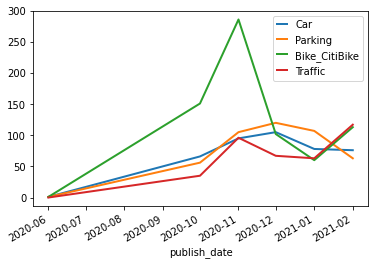

In [669]:
b_group[b_group['borocd']==101][['Car','Parking','Bike_CitiBike','Traffic']].plot(legend=True,lw=2)

In [647]:
b_group[b_group['borocd']==101].head(1)

borocd  DoT  Parking  CitiBike  Greenway  Pedestrian  \
publish_date                                                         
2020-06-01       101  0.0      1.0       0.0       0.0         0.0   

              Vision Zero  Transportation  Bike  Scooter  Subway  Traffic  \
publish_date                                                                
2020-06-01            0.0             5.0   1.0      0.0     0.0      0.0   

              Street Safety  Bus  Car  Bike_CitiBike  
publish_date                                          
2020-06-01              2.0  0.0  1.0            1.0

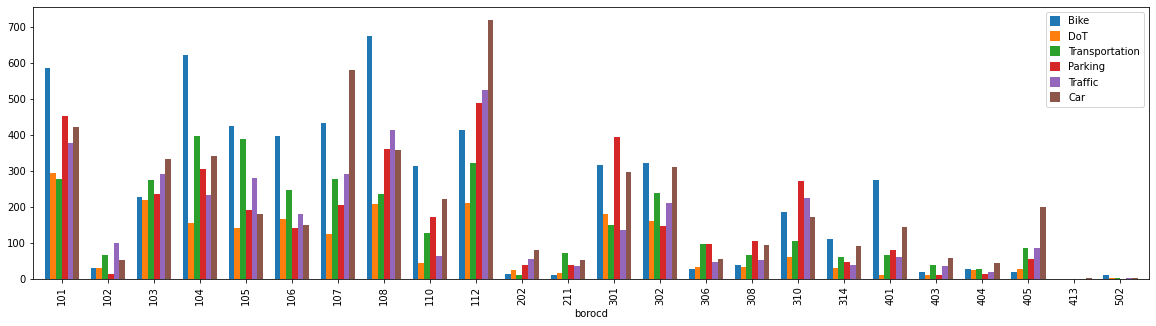

In [580]:
fig, axes = plt.subplots(figsize=(20, 5))
topic_map.groupby('borocd')[[
       'Bike', "DoT", 
       'Transportation', 'Parking', 'Traffic',
       'Car']].sum().plot(kind='bar', ax= axes, width=.75 )

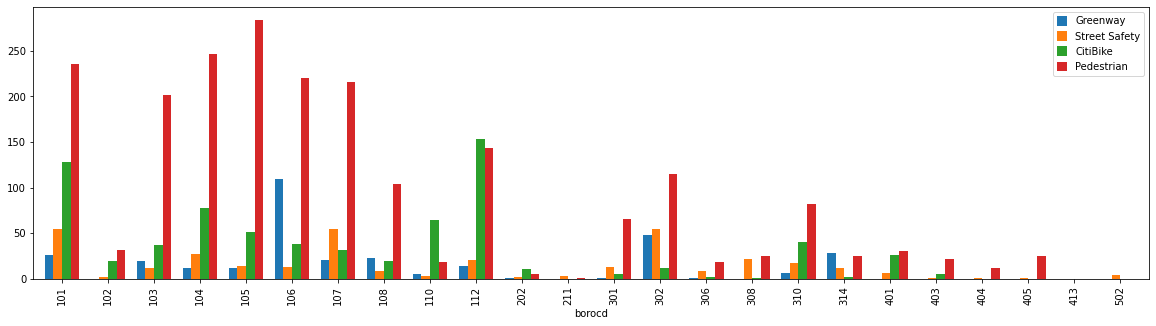

In [579]:
fig, axes = plt.subplots(figsize=(20, 5))
topic_map.groupby('borocd')[[
       'Greenway','Street Safety', 'CitiBike', 'Pedestrian']].sum().plot(kind='bar', ax= axes, width=.75 )

In [502]:
topic_map[topic_map['borocd']==108].head(1)

borocd                cd_full_title    video_url  \
339     108  Manhattan Community Board 8  g1gcT-cVsWM   

                          author publish_date                       title  \
339  Manhattan Community Board 8   2020-12-10  Land Use Committee Meeting   

                                                 topic  \
339  [[0.541478157043457, 'Zoning'], [0.09162350744...   

                                        fullTranscript  \
339  Foreign me, okay, will tell me when it's a goo...   

                                            word_count   length  DoT  Parking  \
339  {'building': 47, 'buildings': 29, 'flood': 38,...  3:14:40  NaN      9.0   

     CitiBike  Greenway  Pedestrian  Vision Zero  Transportation  Bike  \
339       NaN       NaN         1.0          NaN             3.0   0.0   

     Scooter  Subway  Traffic  Street Safety  Bus  Car  
339      0.0     5.0      2.0            0.0  0.0  0.0

In [496]:
topic_map[topic_map['borocd']==302].head(1)

borocd               cd_full_title    video_url  \
589     302  Brooklyn Community Board 2  VOWykNjXjuw   

                         author publish_date                         title  \
589  Brooklyn Community Board 2   2020-06-16  Parks & Recreation Committee   

                                                 topic  \
589  [[0.9073856472969055, 'Parks'], [0.01812242530...   

                                        fullTranscript  \
589  Five, and also for purposes of transparency, a...   

                                            word_count   length  DoT  Parking  \
589  {'parks': 5, 'moment': 2, 'park': 5, 'staff': ...  1:41:08  NaN      NaN   

     CitiBike  Greenway  Pedestrian  Vision Zero  Transportation  Bike  \
589       NaN       NaN         1.0          NaN             0.0   1.0   

     Scooter  Subway  Traffic  Street Safety  Bus  Car  
589      0.0     0.0      0.0            0.0  0.0  2.0

In [317]:
topic_map[topic_map['borocd']==401].sort_values(by='Car',ascending=False).head()

borocd             cd_full_title    video_url                    author  \
789     401  Queens Community Board 1  R4EKhX8Gqio  Queens Community Board 1   
793     401  Queens Community Board 1  xwHk_ul-gGQ  Queens Community Board 1   
791     401  Queens Community Board 1  JIRoMz8tXzE  Queens Community Board 1   
794     401  Queens Community Board 1  Qx1kSfJBhDc  Queens Community Board 1   
790     401  Queens Community Board 1  WYtZwaNoe_w  Queens Community Board 1   

    publish_date                           title  \
789   2020-06-17  Community Board Queens Meeting   
793   2021-01-20          Community Board Queens   
791   2020-11-18       Queens Full Board Meeting   
794   2021-02-17       Queens Full Board Meeting   
790   2020-10-21       Queens Full Board Meeting   

                                                 topic  \
789  [[0.3143855035305023, 'Transportation'], [0.20...   
793  [[0.5434606075286865, 'Zoning'], [0.2348384857...   
791  [[0.6782008409500122, 'Housing'], [0.150473758...   
794  [[0.30393028259277344, 'Infrastructure'], [0.1...   
790  [[0.35772138833999634, 'Housing'], [0.26195615...   

                                        fullTranscript  \
789  Madame, chairman of the board, Marie Tony Olli...   
793  As I mentioned, my name is Frank Sinjak, I'm a...   
791  Eh Madam chair your meeting is now live. Thank...   
794  I think we're ready for I found you muted Paul...   
790  Speaking or resorting to R6A, there are r6as m...   

                                            word_count   length  Parking  \
789  {'bike': 51, 'lane': 47, 'lanes': 21, 'traffic...  2:57:25     28.0   
793  {'building': 30, 'street': 8, 'housing': 16, '...  2:27:28     20.0   
791  {'windows': 46, 'street': 8, 'building': 4, 'r...  2:01:30      1.0   
794  {'bike': 28, 'business': 21, 'plan': 19, 'sani...  1:56:20      5.0   
790  {'parking': 3, 'restaurant': 3, 'report': 4, '...  1:16:50     25.0   

      DoT  CitiBike  Greenway  Vision Zero  Transportation   Bike  Scooter  \
789   4.0       3.0       NaN          NaN            15.0  167.0      3.0   
793   3.0       6.0       NaN          NaN            19.0   31.0      2.0   
791  12.0       2.0       NaN          NaN             5.0   16.0      5.0   
794   6.0       7.0       NaN          NaN            14.0   58.0      0.0   
790   6.0       7.0       NaN          NaN             7.0    3.0      0.0   

     Subway  Traffic  Street Safety  Bus   Car  Pedestrian  Truck  \
789     2.0     31.0            5.0  1.0  55.0        19.0    2.0   
793     9.0     21.0            0.0  3.0  39.0         4.0    7.0   
791     0.0      4.0            0.0  0.0  24.0         5.0   10.0   
794     1.0      1.0            0.0  0.0  18.0         6.0    0.0   
790     2.0      1.0            0.0  0.0   5.0         2.0    0.0   

     Bike_CitiBike  
789          170.0  
793           37.0  
791           18.0  
794           65.0  
790           10.0

In [584]:
cb_12 = topic_map[topic_map['borocd']==112]

In [585]:
cb_12.set_index('publish_date', inplace=True)

In [478]:
topic_map.groupby('borocd')[['DoT',
       'Parking', 'CitiBike', 'Greenway', 'Pedestrian', 'Vision Zero',
       'Transportation', 'Bike', 'Scooter', 'Subway', 'Traffic',
       'Street Safety', 'Bus', 'Car']].sum().describe()

DoT     Parking    CitiBike   Greenway  Pedestrian  Vision Zero  \
count   24.000000   24.000000   24.000000  24.000000   24.000000    24.000000   
mean    88.541667  158.291667   24.208333  12.416667   52.208333     0.125000   
std     85.662624  149.590304   33.107177  21.305065   61.638483     0.448427   
min      0.000000    0.000000    0.000000   0.000000    0.000000     0.000000   
25%     23.750000   37.750000    1.750000   0.000000   12.000000     0.000000   
50%     38.000000  105.500000   12.000000   2.500000   19.500000     0.000000   
75%    155.750000  242.500000   36.000000  19.250000   91.250000     0.000000   
max    286.000000  488.000000  127.000000  96.000000  221.000000     2.000000   

       Transportation        Bike    Scooter      Subway     Traffic  \
count        24.00000   24.000000  24.000000   24.000000   24.000000   
mean        148.25000  157.166667   7.666667   61.625000  151.958333   
std         122.71928  154.580123  10.239169   57.927851  143.752045   
min           0.00000    0.000000   0.000000    0.000000    0.000000   
25%          63.75000   19.750000   0.000000   15.500000   40.750000   
50%          93.00000  130.000000   3.500000   40.000000   91.500000   
75%         248.50000  266.250000   9.250000   99.000000  242.000000   
max         396.00000  554.000000  37.000000  199.000000  523.000000   

       Street Safety         Bus         Car  
count      24.000000   24.000000   24.000000  
mean        7.250000   73.750000  156.000000  
std         8.404192   82.072211  138.868408  
min         0.000000    0.000000    2.000000  
25%         2.000000   19.250000   44.000000  
50%         4.500000   43.500000  113.500000  
75%         9.500000  101.000000  238.250000  
max        34.000000  312.000000  549.000000

In [322]:
cb

202

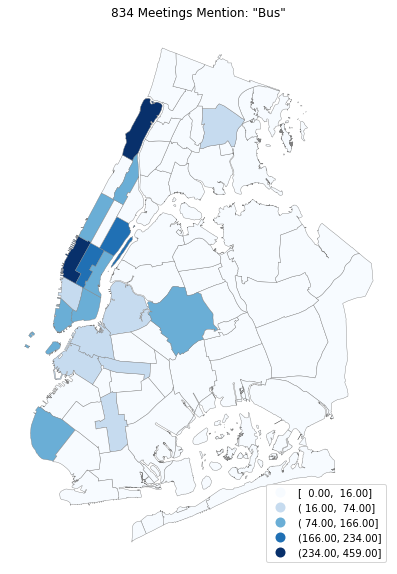

In [331]:
map_one_topic('Bus', topic_map)